In [1]:
#  Name:      Tom Bresee
#  Purpose:   Sweep hyperparameters examining trends in performance
#  Dataset:   Full Dataset
#  Prices:    Normalized Resale Prices 
#  Project:   Capstone

<br>

<br>

**Overall Observations:**
    
Sweeping hyperparameters and viewing resulting MSE/R^2 gives remarkable insight

MSE and R^2 should always be at least calculated to five decimal points, so that variations in outputs can be compared.  Sometimes the increase in performance is minimal, but difficult to see when plotted to three decimal points

Sometimes you see many combinations that are near optimal, it happens (example:  max_depth of 3 vs 5)

Starting with the default parametes shows that the base assumptions that XGBoost uses are pretty darn good.  Extensive tuning then gets you really good increases in performance/accuracy.

*Plotting the R^2 across hyperparameter sweeps is unbelievably insightful, one for instance can see how increasing regularization parameters can mitigate and even remove overfitting. One can see how increase number of tree estimators can increase incrementally R^2*  

*At the very bottom are some gridsearch python code previous tests...*

<br>

*Example of sweep results:*

*-  sweeping over max_depth, one can see how it increases R^2 for the training set (i.e. overfitting), and one can see how it slowly decrements R^ as max_depth increases.  Leading one to see the importance of keeping max_depth to a minimal value whenever possible, and then using regularization techniques and hyperparameters such as gamma and alpha to reign overfitting in...*

*-  the plots will always be performance of 1) training (firrst plot)  2) test  3) validation (third plot) sets*

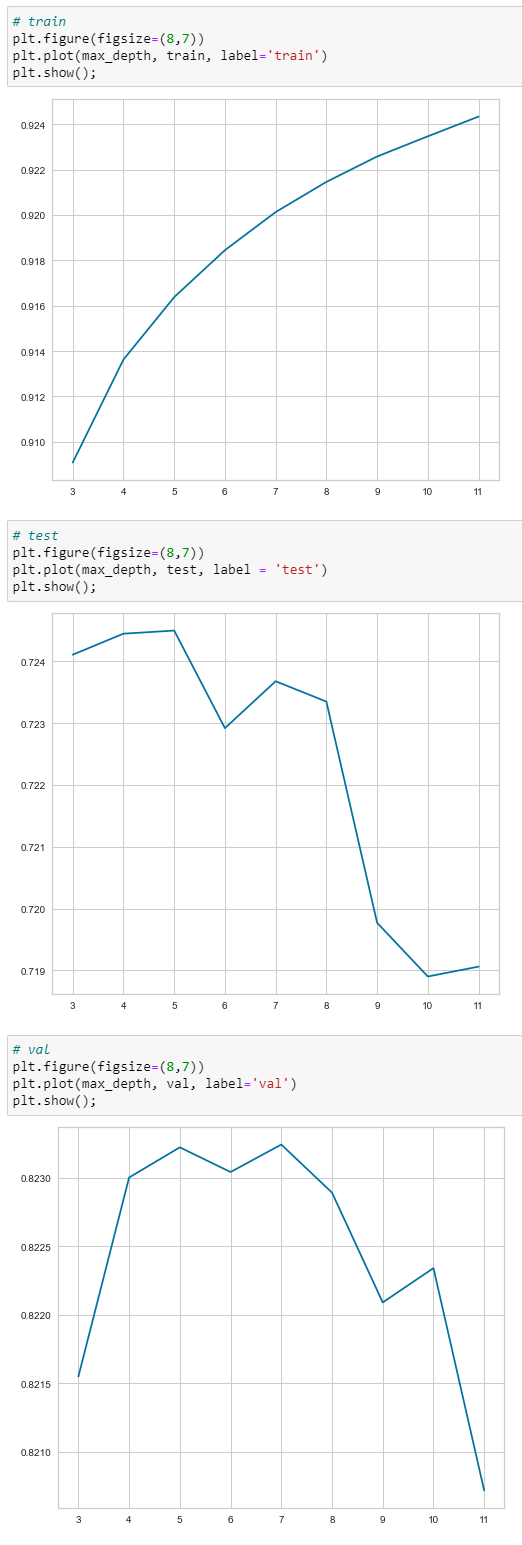

<br>

<br>

**Understanding how well models did:**

*If one wanted to jump around results:*

*If you want to quickly scan thru this document after you read it, you can search on the terms '0.822' and '0.823', and that will quickly help you find the parameters that got you a pretty high validation score.*

*If you want to quickly scan thru this document after you read it, you can search on the terms '0.725', and that will quickly help you find the parameters that got you a pretty high test score.*

<br>

<br>

**Outputs:**

```python

# SOME OF THE BEST VALUES I WAS ABLE TO REACH:

--- Test Set ---
Mean Absolute Error: ... 7.43
Mean Squared Error:..... 96.23
RMSE: .................. 9.81
Coeff of det (R^2):..... 0.72582    i.e. .726 

--- Val Set ---
Mean Absolute Error: ... 6.14
Mean Squared Error:..... 70.14
RMSE: .................. 8.38
Coeff of det (R^2):..... 0.82363    i.e. .824

--- Train Set ---
Mean Absolute Error: ... 3.61
Mean Squared Error:..... 24.67
RMSE: .................. 4.97
Coeff of det (R^2):..... 0.91649

    
with: 
    
max_depth=5,
gamma = 10,
subsample=0.5,
colsample_bytree = 0.5,
n_estimators=2800,
learning_rate=0.1,
tree_method='gpu_hist', 
gpu_id = 0)
        
```
       

*Increasing the subsample ALSO helped a fair amount...*

In [ ]:

with:
    
min_child_weight=4,   
gamma = 10,   
subsample = what you see below, 
colsample_bytree = 0.5,
reg_lambda = 1,
max_depth=5, 
n_estimators=2500,
learning_rate= 0.10,
tree_method='gpu_hist', gpu_id=0)
    

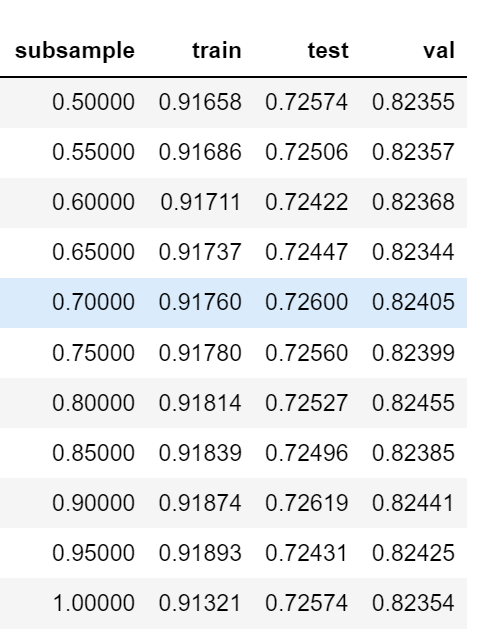

RERUNNING WITH A LITTLE MORE TREES: 

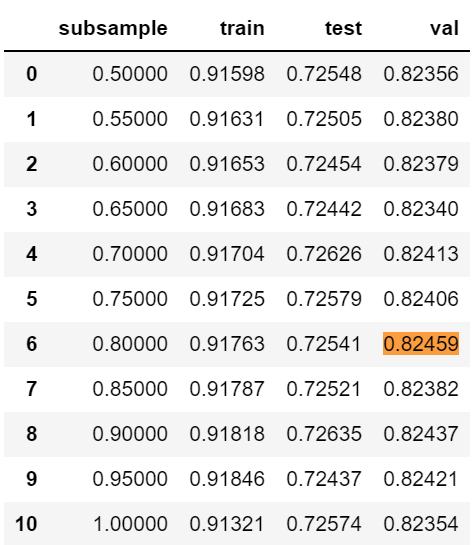

<br>

<br>

<br>

<br>

**----- DEFAULT XGBOOST REGRESSION HYPERPARAMETERS -----**

```python

DEFAULT_HYPS_FOR_XGBOOST_REGRESSOR = {
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'objective': 'reg:squarederror',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}
```


<br>

<br>

**----- FEATURES TO USE -----**

In [290]:
#  features_to_use_from_MM == list_from_stuart   -> True

In [148]:

# this should be exactly 350 features + 1 (the target, which i carve out later)

features_to_use_from_MM = \
['price_per_sq_m_per_lease_yr_norm', # later put as 'target'
 'storey_range_min',
 'storey_range_max',
 'n_rooms', 
 'num_preschools_400m',
 'num_preschools_1km',
 'num_primary_schools_1km',
 'score_primary_schools_1km',
 'num_primary_schools_2km',
 'score_primary_schools_2km',
 'num_secondary_schools_1km',
 'score_secondary_schools_1km',
 'num_secondary_schools_2km',
 'score_secondary_schools_2km',
 'num_healthcare_2km',
 'num_healthcare_5km',
 'nearest_healthcare_clinc',
 'nearest_police',
 'nearest_fire',
 'num_maj_parks_1km',
 'num_maj_parks_2km',
 'nearest_maj_park',
 'num_min_parks_1km',
 'num_min_parks_2km',
 'nearest_min_park',
 'num_waterbodies_100m',
 'num_waterbodies_500m',
 'nearest_waterbody',
 'num_supermarket_1_5km',
 'nearest_supermarket',
 'num_wetmarket_1_5km',
 'nearest_wetmarket',
 'nearest_expressway',
 'nearest_expressway_entrance_exit',
 'num_busstops_100m',
 'num_busstops_400m',
 'nearest_busstop',
 'num_taxistands_100m',
 'num_taxistands_400m',
 'nearest_taxistand',
 'num_transit_stations_1_5km',
 'score_stations_1_5km',
 'nearest_transit_station',
 'num_transit_exits_100m',
 'num_transit_exits_400m',
 'dist_to_nearest_transit_exit',
 'num_malls_1_5km',
 'nearest_mall',
 'num_hawker_1_5km',
 'nearest_hawker',
 'dist_to_central_business_district',
 'dist_to_holland_village',
 'dist_to_dempsey_hill',
 'dist_to_serangoon_gardens_circus',
 'dist_to_orchard',
 'dist_to_arab_street',
 'dist_to_thomson_ridge',
 'dist_to_east_coast_park',
 'dist_to_bishan_park',
 'dist_to_botanic_gardens',
 'dist_to_hort_park',
 'dist_to_sentosa',
 'dist_to_gardens_by_the_bay',
 'dist_to_con_area_id_1',
 'dist_to_con_area_id_2',
 'dist_to_con_area_id_3',
 'dist_to_con_area_id_4',
 'dist_to_con_area_id_5',
 'dist_to_con_area_id_6',
 'dist_to_con_area_id_7',
 'dist_to_con_area_id_8',
 'dist_to_con_area_id_9',
 'dist_to_con_area_id_10',
 'dist_to_con_area_id_11',
 'dist_to_con_area_id_12',
 'dist_to_con_area_id_13',
 'dist_to_con_area_id_14',
 'dist_to_con_area_id_15',
 'dist_to_con_area_id_16',
 'dist_to_con_area_id_17',
 'dist_to_con_area_id_18',
 'dist_to_con_area_id_19',
 'dist_to_con_area_id_20',
 'dist_to_con_area_id_21',
 'dist_to_con_area_id_22',
 'dist_to_con_area_id_23',
 'dist_to_con_area_id_24',
 'dist_to_con_area_id_25',
 'dist_to_con_area_id_26',
 'dist_to_con_area_id_27',
 'dist_to_con_area_id_28',
 'dist_to_con_area_id_29',
 'dist_to_con_area_id_30',
 'dist_to_con_area_id_31',
 'dist_to_con_area_id_32',
 'dist_to_con_area_id_33',
 'dist_to_con_area_id_34',
 'dist_to_con_area_id_35',
 'dist_to_con_area_id_36',
 'dist_to_con_area_id_37',
 'dist_to_con_area_id_38',
 'dist_to_con_area_id_39',
 'dist_to_con_area_id_40',
 'dist_to_con_area_id_41',
 'dist_to_con_area_id_42',
 'dist_to_con_area_id_43',
 'dist_to_con_area_id_44',
 'dist_to_con_area_id_45',
 'dist_to_con_area_id_46',
 'dist_to_con_area_id_47',
 'dist_to_con_area_id_48',
 'dist_to_con_area_id_49',
 'dist_to_con_area_id_50',
 'dist_to_con_area_id_51',
 'dist_to_con_area_id_52',
 'dist_to_con_area_id_53',
 'dist_to_con_area_id_54',
 'dist_to_con_area_id_55',
 'dist_to_con_area_id_56',
 'dist_to_con_area_id_57',
 'dist_to_con_area_id_58',
 'dist_to_con_area_id_59',
 'dist_to_con_area_id_60',
 'dist_to_con_area_id_61',
 'dist_to_con_area_id_62',
 'dist_to_con_area_id_63',
 'dist_to_con_area_id_64',
 'dist_to_con_area_id_65',
 'dist_to_con_area_id_66',
 'dist_to_con_area_id_67',
 'dist_to_con_area_id_68',
 'dist_to_con_area_id_69',
 'dist_to_con_area_id_70',
 'dist_to_con_area_id_71',
 'dist_to_con_area_id_72',
 'dist_to_con_area_id_73',
 'dist_to_con_area_id_74',
 'dist_to_con_area_id_75',
 'dist_to_con_area_id_76',
 'dist_to_con_area_id_77',
 'dist_to_con_area_id_78',
 'dist_to_con_area_id_79',
 'dist_to_con_area_id_80',
 'dist_to_con_area_id_81',
 'dist_to_con_area_id_82',
 'dist_to_con_area_id_83',
 'dist_to_con_area_id_84',
 'dist_to_con_area_id_85',
 'dist_to_con_area_id_86',
 'dist_to_con_area_id_87',
 'dist_to_con_area_id_88',
 'dist_to_con_area_id_89',
 'dist_to_con_area_id_90',
 'dist_to_con_area_id_91',
 'dist_to_con_area_id_92',
 'dist_to_con_area_id_93',
 'dist_to_con_area_id_94',
 'dist_to_con_area_id_95',
 'dist_to_con_area_id_96',
 'dist_to_con_area_id_97',
 'dist_to_con_area_id_98',
 'dist_to_con_area_id_99',
 'dist_to_con_area_id_100',
 'dist_to_con_area_id_101',
 'dist_to_con_area_id_102',
 'dist_to_con_area_id_103',
 'dist_to_con_area_id_104',
 'dist_to_con_area_id_105',
 'dist_to_con_area_id_106',
 'dist_to_con_area_id_107',
 'dist_to_con_area_id_108',
 'dist_to_con_area_id_109',
 'dist_to_con_area_id_110',
 'dist_to_con_area_id_111',
 'dist_to_con_area_id_112',
 'dist_to_con_area_id_113',
 'dist_to_con_area_id_114',
 'dist_to_con_area_id_115',
 'dist_to_con_area_id_116',
 'dist_to_con_area_id_117',
 'dist_to_con_area_id_118',
 'dist_to_con_area_id_119',
 'dist_to_con_area_id_120',
 'dist_to_con_area_id_249',
 'dist_to_con_area_id_250',
 'dist_to_con_area_id_251',
 'dist_to_con_area_id_252',
 'dist_to_con_area_id_253',
 'dist_to_con_area_id_254',
 'dist_to_con_area_id_121',
 'dist_to_con_area_id_122',
 'dist_to_con_area_id_123',
 'dist_to_con_area_id_124',
 'dist_to_con_area_id_125',
 'dist_to_con_area_id_126',
 'dist_to_con_area_id_127',
 'dist_to_con_area_id_128',
 'dist_to_con_area_id_129',
 'dist_to_con_area_id_130',
 'dist_to_con_area_id_131',
 'dist_to_con_area_id_132',
 'dist_to_con_area_id_133',
 'dist_to_con_area_id_134',
 'dist_to_con_area_id_135',
 'dist_to_con_area_id_136',
 'dist_to_con_area_id_137',
 'dist_to_con_area_id_138',
 'dist_to_con_area_id_139',
 'dist_to_con_area_id_140',
 'dist_to_con_area_id_141',
 'dist_to_con_area_id_142',
 'dist_to_con_area_id_143',
 'dist_to_con_area_id_144',
 'dist_to_con_area_id_145',
 'dist_to_con_area_id_146',
 'dist_to_con_area_id_147',
 'dist_to_con_area_id_148',
 'dist_to_con_area_id_149',
 'dist_to_con_area_id_150',
 'dist_to_con_area_id_151',
 'dist_to_con_area_id_152',
 'dist_to_con_area_id_153',
 'dist_to_con_area_id_154',
 'dist_to_con_area_id_155',
 'dist_to_con_area_id_156',
 'dist_to_con_area_id_157',
 'dist_to_con_area_id_158',
 'dist_to_con_area_id_159',
 'dist_to_con_area_id_160',
 'dist_to_con_area_id_161',
 'dist_to_con_area_id_162',
 'dist_to_con_area_id_163',
 'dist_to_con_area_id_164',
 'dist_to_con_area_id_165',
 'dist_to_con_area_id_166',
 'dist_to_con_area_id_167',
 'dist_to_con_area_id_168',
 'dist_to_con_area_id_169',
 'dist_to_con_area_id_170',
 'dist_to_con_area_id_171',
 'dist_to_con_area_id_172',
 'dist_to_con_area_id_173',
 'dist_to_con_area_id_174',
 'dist_to_con_area_id_175',
 'dist_to_con_area_id_176',
 'dist_to_con_area_id_177',
 'dist_to_con_area_id_178',
 'dist_to_con_area_id_179',
 'dist_to_con_area_id_180',
 'dist_to_con_area_id_181',
 'dist_to_con_area_id_182',
 'dist_to_con_area_id_183',
 'dist_to_con_area_id_184',
 'dist_to_con_area_id_185',
 'dist_to_con_area_id_186',
 'dist_to_con_area_id_187',
 'dist_to_con_area_id_188',
 'dist_to_con_area_id_189',
 'dist_to_con_area_id_190',
 'dist_to_con_area_id_191',
 'dist_to_con_area_id_192',
 'dist_to_con_area_id_193',
 'dist_to_con_area_id_194',
 'dist_to_con_area_id_195',
 'dist_to_con_area_id_196',
 'dist_to_con_area_id_197',
 'dist_to_con_area_id_198',
 'dist_to_con_area_id_199',
 'dist_to_con_area_id_200',
 'dist_to_con_area_id_201',
 'dist_to_con_area_id_202',
 'dist_to_con_area_id_203',
 'dist_to_con_area_id_204',
 'dist_to_con_area_id_205',
 'dist_to_con_area_id_206',
 'dist_to_con_area_id_207',
 'dist_to_con_area_id_208',
 'dist_to_con_area_id_209',
 'dist_to_con_area_id_210',
 'dist_to_con_area_id_211',
 'dist_to_con_area_id_212',
 'dist_to_con_area_id_213',
 'dist_to_con_area_id_214',
 'dist_to_con_area_id_215',
 'dist_to_con_area_id_216',
 'dist_to_con_area_id_217',
 'dist_to_con_area_id_218',
 'dist_to_con_area_id_219',
 'dist_to_con_area_id_220',
 'dist_to_con_area_id_221',
 'dist_to_con_area_id_222',
 'dist_to_con_area_id_223',
 'dist_to_con_area_id_224',
 'dist_to_con_area_id_225',
 'dist_to_con_area_id_226',
 'dist_to_con_area_id_227',
 'dist_to_con_area_id_228',
 'dist_to_con_area_id_229',
 'dist_to_con_area_id_230',
 'dist_to_con_area_id_231',
 'dist_to_con_area_id_232',
 'dist_to_con_area_id_233',
 'dist_to_con_area_id_234',
 'dist_to_con_area_id_235',
 'dist_to_con_area_id_236',
 'dist_to_con_area_id_237',
 'dist_to_con_area_id_238',
 'dist_to_con_area_id_239',
 'dist_to_con_area_id_240',
 'dist_to_con_area_id_241',
 'dist_to_con_area_id_242',
 'dist_to_con_area_id_243',
 'dist_to_con_area_id_244',
 'dist_to_con_area_id_245',
 'dist_to_con_area_id_246',
 'dist_to_con_area_id_247',
 'dist_to_con_area_id_248',
 'town_bedok',
 'town_bishan',
 'town_bukit_batok',
 'town_bukit_merah',
 'town_bukit_panjang',
 'town_bukit_timah',
 'town_central_area',
 'town_choa_chu_kang',
 'town_clementi',
 'town_geylang',
 'town_hougang',
 'town_jurong_east',
 'town_jurong_west',
 'town_kallang_whampoa',
 'town_lim_chu_kang',
 'town_marine_parade',
 'town_pasir_ris',
 'town_punggol',
 'town_queenstown',
 'town_sembawang',
 'town_sengkang',
 'town_serangoon',
 'town_tampines',
 'town_toa_payoh',
 'town_woodlands',
 'town_yishun',
 'flat_type_2_room',
 'flat_type_3_room',
 'flat_type_4_room',
 'flat_type_5_room',
 'flat_type_executive',
 'flat_type_multi_generation']
    

<br>

<br>

**----- DEFINITIONS -----**

```python 
# XGBoost Hyperparameter Definitions:

XGBoost Hyperparameters:

n_estimators (int) – Number of gradient boosted trees.

max_depth (int) – Maximum tree depth for base learners.

learning_rate (float) – Boosting learning rate.

booster (string) – Specify which booster to use: gbtree, gblinear or dart.

tree_method (string) – Specify which tree method to use.

gamma (float) – Minimum loss reduction required to make a further partition on a 
leaf node of the tree.

min_child_weight (float) – Minimum sum of instance weight(hessian) needed in a child.

max_delta_step (float) – Maximum delta step we allow each tree’s weight estimation to be.

subsample (float) – Subsample ratio of the training instance.

colsample_bytree (float) – Subsample ratio of columns when constructing each tree.

colsample_bylevel (float) – Subsample ratio of columns for each level.

colsample_bynode (float) – Subsample ratio of columns for each split.

reg_alpha (float) – L1 regularization term on weights

reg_lambda (float) – L2 regularization term on weights

```

<br>

<br>

In [150]:

# Importing Libraries
import time
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format) 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import yellowbrick
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
import xgboost as xgb
from xgboost import XGBRegressor
cm = sns.light_palette("blue", as_cmap=True)
# correlations.style.set_caption('Correlation Values Ranked').background_gradient(cmap=cm
from pprint import pprint
# import shap
# shap.initjs()


In [251]:

# IMPORTANT

pd.options.display.float_format = "{:,.5f}".format

# need five decimal point precision ! 


<br>

<br>

**----- READING IN THE DATA -----**

In [151]:

# the .pkl files are the cleaned train/val/test data (including location features)
# this does include the location features...

df_train = pd.read_pickle('train_df.pkl')  
df_val   = pd.read_pickle('validate_df.pkl')
df_test  = pd.read_pickle('test_df.pkl')


In [153]:

len(df_train), len(df_val), len(df_test)  # (268032, 75498, 96260)


(268032, 75498, 96260)

In [154]:

print('\nTotal Number of Rows/Observations:', 
      len(df_train) + len(df_val) + len(df_test), "\n")



Total Number of Rows/Observations: 439790 



In [155]:
# ! 
# i really think we should use this, it helps !  (but not using)
# 
# df_train['storey_range_avg'] = (df_train['storey_range_min'] + df_train['storey_range_max'])/2
# df_val['storey_range_avg'] = (df_val['storey_range_min'] + df_val['storey_range_max'])/2
# df_test['storey_range_avg'] = (df_test['storey_range_min'] + df_test['storey_range_max'])/2

In [156]:
# len(df_train.columns)

In [157]:
# model_features = list(set(list(df_train.columns)) - set(c2d))

In [158]:
# len(model_features) + len(c2d)

In [159]:
# assert (len(model_features) + len(c2d) == len(df_train.columns))

In [160]:
# sorted(model_features)

In [161]:
# assert ('price_per_sq_m_per_lease_yr_norm' in model_features)  
# then will be removed when training, within the function definition

In [162]:
# print('\nTotal Number of Input Features to Model:', len(model_features), '\n')

In [163]:
!nvidia-smi

Tue Apr 19 12:02:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 457.51       Driver Version: 457.51       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 2060   WDDM  | 00000000:09:00.0  On |                  N/A |
| 31%   38C    P8    12W / 160W |   1254MiB /  6144MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [164]:

import multiprocessing
n_jobs = multiprocessing.cpu_count()-1
n_jobs  # in theory you could run 23 cores (just below max)


23

<br>

<br>

<h1 style="text-align: center;">Model</h1>


In [174]:

def QRF(df_train, df_val, df_test,model_features):
    
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    xg = xgb.XGBRegressor()
                         
    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    print('\n--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.3f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('\n--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.3f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))
    print('\n--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.3f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('\nModel Hyperparameters Definitions:')
    pprint(xg.get_params())
    print(xg.get_xgb_params())
    
    print("\n--- %s seconds ---" % round((time.time() - start_time)))

QRF(df_train, df_val, df_test,features_to_use_from_MM)



--- Test Set ---
Mean Absolute Error: ... 7.486478949499887
Mean Squared Error:..... 98.396
RMSE: .................. 9.919455082083461
Coeff of det (R^2):..... 0.720

--- Val Set ---
Mean Absolute Error: ... 6.199748722711161
Mean Squared Error:..... 71.647
RMSE: .................. 8.464438603067821
Coeff of det (R^2):..... 0.820

--- Train Set ---
Mean Absolute Error: ... 3.801612508552019
Mean Squared Error:..... 27.006
RMSE: .................. 5.196763958527483
Coeff of det (R^2):..... 0.909

Model Hyperparameters Definitions:
{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,

In [122]:
  
#  Objective function ............. reg:squarederror
#  Note ........................... objective will run on GPU
#  Metric (evaluation) function ...  
       
def QRF(df_train, df_val, df_test,model_features):
    
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    special_comments = "\nNote:  no params at all defined"
    
    xg = xgb.XGBRegressor(
        
        # objective='reg:squarederror',
        
        # max_depth = 5,
        
        # min_child_weight = 4,
        
        # gamma = 10,
        
        # subsample = 0.5,
        
        # colsample_bytree = 0.5,
        
        # reg_alpha = 100,
        
        # reg_lambda = 1,
        
        # n_estimators = 500,
        
        # learning_rate = 0.1,
        
        # early_stopping_rounds = 10,
        
        # validate_parameters = 1, # n_jobs = 1
         #seed=42, random_state=42, 
        # tree_method='gpu_hist', gpu_id = 0, 
        )
    
                         
    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    print('\n--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.3f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('\n--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.3f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))
    print('\n--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.3f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('\nModel Hyperparameters Definitions:')
    pprint(xg.get_params())
    
    print(special_comments)
    
    print("\n--- %s seconds ---" % round((time.time() - start_time)))

QRF(df_train, df_val, df_test,features_to_use_from_MM)



--- Test Set ---
Mean Absolute Error: ... 7.486478949499887
Mean Squared Error:..... 98.396
RMSE: .................. 9.919455082083461
Coeff of det (R^2):..... 0.720

--- Val Set ---
Mean Absolute Error: ... 6.199748722711161
Mean Squared Error:..... 71.647
RMSE: .................. 8.464438603067821
Coeff of det (R^2):..... 0.820

--- Train Set ---
Mean Absolute Error: ... 3.801612508552019
Mean Squared Error:..... 27.006
RMSE: .................. 5.196763958527483
Coeff of det (R^2):..... 0.909

Model Hyperparameters Definitions:
{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,

In [291]:
# stop and read this: 

# without any tuning:

# --- Test Set ---
# Coeff of det (R^2):..... 0.720

# --- Val Set ---
# Coeff of det (R^2):..... 0.820

# --- Train Set ---
# Coeff of det (R^2):..... 0.909

In [123]:
  
#  Objective function ............. reg:squarederror
#  Note ........................... objective will run on GPU
#  Metric (evaluation) function ...  
       
def QRF(df_train, df_val, df_test,model_features):
    
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    special_comments = "\nNote: adding GPU for speed, n_estimators = 2000"
    
    xg = xgb.XGBRegressor(
        
        # objective='reg:squarederror',
        
        # max_depth = 5,
        
        # min_child_weight = 4,
        
        # gamma = 10,
        
        # subsample = 0.5,
        
        # colsample_bytree = 0.5,
        
        # reg_alpha = 100,
        
        # reg_lambda = 1,
        
        n_estimators = 2000,
        
        # learning_rate = 0.1,
        
        # early_stopping_rounds = 10,
        
        validate_parameters = 1, # n_jobs = 1
        seed=42, random_state=42, 
        tree_method='gpu_hist', gpu_id = 0, 
        )
    
                         
    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    print('\n--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.3f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('\n--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.3f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))
    print('\n--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.3f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('\nModel Hyperparameters Definitions:')
    pprint(xg.get_params())
    
    print(special_comments)
    
    print("\n--- %s seconds ---" % round((time.time() - start_time)))

QRF(df_train, df_val, df_test,features_to_use_from_MM)



--- Test Set ---
Mean Absolute Error: ... 7.638363100257217
Mean Squared Error:..... 101.328
RMSE: .................. 10.066162686918407
Coeff of det (R^2):..... 0.711

--- Val Set ---
Mean Absolute Error: ... 6.242294450482644
Mean Squared Error:..... 73.405
RMSE: .................. 8.567690995986366
Coeff of det (R^2):..... 0.815

--- Train Set ---
Mean Absolute Error: ... 3.2348531934486635
Mean Squared Error:..... 20.694
RMSE: .................. 4.549077297278212
Coeff of det (R^2):..... 0.930

Model Hyperparameters Definitions:
{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': 0,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 

In [124]:
  
#  Objective function ............. reg:squarederror
#  Note ........................... objective will run on GPU
#  Metric (evaluation) function ...  
       
def QRF(df_train, df_val, df_test,model_features):
    
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    special_comments = "\nNote: attempting to replicate what he did"
    
    #     xg = xgb.XGBRegressor(

    #         # objective='reg:squarederror',

    #         # max_depth = 5,

    #         # min_child_weight = 4,

    #         # gamma = 10,

    #         # subsample = 0.5,

    #         # colsample_bytree = 0.5,

    #         # reg_alpha = 100,

    #         # reg_lambda = 1,

    #         n_estimators = 2000,

    #         # learning_rate = 0.1,

    #         # early_stopping_rounds = 10,

    #         validate_parameters = 1, # n_jobs = 1
    #         seed=42, random_state=42, 
    #         tree_method='gpu_hist', gpu_id = 0, 
    #         )
    
    xg = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=3,
    min_child_weight=4,
    gamma = 9,
    subsample=0.5,
    colsample_bytree = 0.5,
    reg_alpha = 100,
    reg_lambda = 1,
    n_estimators=3000,
    learning_rate=0.1,
    nthread=4,
    seed=42,
    tree_method='hist')
        
    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    print('\n--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.3f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    print('\n--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.3f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))
    print('\n--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.3f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    print('\nModel Hyperparameters Definitions:')
    pprint(xg.get_params())
    
    print(special_comments)
    
    print("\n--- %s seconds ---" % round((time.time() - start_time)))

QRF(df_train, df_val, df_test,features_to_use_from_MM)



--- Test Set ---
Mean Absolute Error: ... 7.425380488224853
Mean Squared Error:..... 96.476
RMSE: .................. 9.822229206636852
Coeff of det (R^2):..... 0.725

--- Val Set ---
Mean Absolute Error: ... 6.177023143707141
Mean Squared Error:..... 71.029
RMSE: .................. 8.427858519975128
Coeff of det (R^2):..... 0.821

--- Train Set ---
Mean Absolute Error: ... 3.7720401513075346
Mean Squared Error:..... 26.762
RMSE: .................. 5.173187285426534
Coeff of det (R^2):..... 0.909

Model Hyperparameters Definitions:
{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 9,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 3,
 'max_leaves': 0,
 'mi

In [142]:
                 
#  Objective function ............. reg:squarederror
#  Note ........................... objective will run on GPU
#  Metric (evaluation) function ...  
       
def QRF(df_train, df_val, df_test,model_features):
    
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    special_comments = "\nNote: same as him, but using GPU instead, looking for accuracy dec"
    
    #     xg = xgb.XGBRegressor(

    #         # objective='reg:squarederror',

    #         # max_depth = 5,

    #         # min_child_weight = 4,

    #         # gamma = 10,

    #         # subsample = 0.5,

    #         # colsample_bytree = 0.5,

    #         # reg_alpha = 100,

    #         # reg_lambda = 1,

    #         n_estimators = 2000,

    #         # learning_rate = 0.1,

    #         # early_stopping_rounds = 10,

    #         validate_parameters = 1, # n_jobs = 1
    #         seed=42, random_state=42, 
    #         tree_method='gpu_hist', gpu_id = 0, 
    #         )
    
    xg = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=3,
    min_child_weight=4,
    gamma = 9,
    subsample=0.5,
    colsample_bytree = 0.5,
    reg_alpha = 3000,
    reg_lambda = 1,
    n_estimators=3000,
    learning_rate=0.1,
    nthread=4,
    seed=42,
    tree_method='gpu_hist', 
    gpu_id=0)

    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    print('\n--- Test Set ---')
    
    print("Mean Absolute Error: ... %.2f" %  mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_test, y_pred_test))
    print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Coeff of det (R^2):..... %.5f" %  r2_score(y_test, y_pred_test))
    print('\n--- Val Set ---')
    print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_val, y_pred_val))
    print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Coeff of det (R^2):..... %.5f" %  r2_score(y_val, y_pred_val))
    print('\n--- Train Set ---')
    print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_train, y_pred_train))
    print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.5f" %  r2_score(y_train, y_pred_train)) 
    print('\nModel Hyperparameters Definitions:')

    pprint(xg.get_params())
    
    print(special_comments)
    
    print("\n--- %s seconds ---" % round((time.time() - start_time)))

QRF(df_train, df_val, df_test,features_to_use_from_MM)



--- Test Set ---
Mean Absolute Error: ... 7.43
Mean Squared Error:..... 96.76
RMSE: .................. 9.84
Coeff of det (R^2):..... 0.72431

--- Val Set ---
Mean Absolute Error: ... 6.18
Mean Squared Error:..... 71.12
RMSE: .................. 8.43
Coeff of det (R^2):..... 0.82118

--- Train Set ---
Mean Absolute Error: ... 3.77
Mean Squared Error:..... 26.76
RMSE: .................. 5.17
Coeff of det (R^2):..... 0.90940

Model Hyperparameters Definitions:
{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 9,
 'gpu_id': 0,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 3,
 'max_leaves': 0,
 'min_child_weight': 4,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estim

In [292]:
# STOP:  REMEMBER:  WHEN YOU ARE USING GPU_HIST, IT WILL BE CLOSE BUT NOT
#        THE PRECISE SAME OUTPUT AS IF YOU USED CPU.  THIS IS NORMAL.
#        THEY ARE IN FACT DIFFERENT ALGORITHM IMPLEMENTATIONS...

In [169]:

def QRF(df_train, df_val, df_test,model_features):
    
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    special_comments = "\nGPU-based, Replicating my best hyperparameters, but on his system, to see if matches"
    
    
    #     xg = xgb.XGBRegressor(

    #         # objective='reg:squarederror',

    #         # max_depth = 5,

    #         # min_child_weight = 4,

    #         # gamma = 10,

    #         # subsample = 0.5,

    #         # colsample_bytree = 0.5,

    #         # reg_alpha = 100,

    #         # reg_lambda = 1,

    #         n_estimators = 2000,

    #         # learning_rate = 0.1,

    #         # early_stopping_rounds = 10,

    #         validate_parameters = 1, # n_jobs = 1
    #         seed=42, random_state=42, 
    #         tree_method='gpu_hist', gpu_id = 0, 
    #         )
    
    # mine to him: 
    
    xg = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=5,
    min_child_weight=4,
    gamma = 10,
    subsample=0.5,
    colsample_bytree = 0.5,
    reg_alpha = 100,
    reg_lambda = 1,
    n_estimators=3000,
    learning_rate=0.1,
    seed=42,
    tree_method='gpu_hist', 
    gpu_id = 0)

    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    print('\n--- Test Set ---')
    
    print("Mean Absolute Error: ... %.2f" %  mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_test, y_pred_test))
    print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Coeff of det (R^2):..... %.5f" %  r2_score(y_test, y_pred_test))
    print('\n--- Val Set ---')
    print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_val, y_pred_val))
    print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Coeff of det (R^2):..... %.5f" %  r2_score(y_val, y_pred_val))
    print('\n--- Train Set ---')
    print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_train, y_pred_train))
    print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.5f" %  r2_score(y_train, y_pred_train)) 
    print('\nModel Hyperparameters Definitions:')

    pprint(xg.get_params())
    
    print(special_comments)
    
    print("\n--- %s seconds ---" % round((time.time() - start_time)))

QRF(df_train, df_val, df_test,features_to_use_from_MM)



--- Test Set ---
Mean Absolute Error: ... 7.43
Mean Squared Error:..... 96.23
RMSE: .................. 9.81
Coeff of det (R^2):..... 0.72582

--- Val Set ---
Mean Absolute Error: ... 6.14
Mean Squared Error:..... 70.14
RMSE: .................. 8.38
Coeff of det (R^2):..... 0.82363

--- Train Set ---
Mean Absolute Error: ... 3.61
Mean Squared Error:..... 24.67
RMSE: .................. 4.97
Coeff of det (R^2):..... 0.91649

Model Hyperparameters Definitions:
{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 10,
 'gpu_id': 0,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 5,
 'max_leaves': 0,
 'min_child_weight': 4,
 'missing': nan,
 'monotone_constraints': '()',
 'n_esti

In [ ]:
? 

In [166]:

def QRF(df_train, df_val, df_test,model_features):
    
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    special_comments = "\nReplicating my best hyperparameters, but on his system, to see if matches"
    
    
    #     xg = xgb.XGBRegressor(

    #         # objective='reg:squarederror',

    #         # max_depth = 5,

    #         # min_child_weight = 4,

    #         # gamma = 10,

    #         # subsample = 0.5,

    #         # colsample_bytree = 0.5,

    #         # reg_alpha = 100,

    #         # reg_lambda = 1,

    #         n_estimators = 2000,

    #         # learning_rate = 0.1,

    #         # early_stopping_rounds = 10,

    #         validate_parameters = 1, # n_jobs = 1
    #         seed=42, random_state=42, 
    #         tree_method='gpu_hist', gpu_id = 0, 
    #         )
    
    # mine to him: 
    
    xg = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=5,
    min_child_weight=4,
    gamma = 10,
    subsample=0.5,
    colsample_bytree = 0.5,
    reg_alpha = 100,
    reg_lambda = 1,
    n_estimators=3000,
    learning_rate=0.1,
    seed=42,
    tree_method='hist', 
    nthread=23)

    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    print('\n--- Test Set ---')
    
    print("Mean Absolute Error: ... %.2f" %  mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_test, y_pred_test))
    print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Coeff of det (R^2):..... %.5f" %  r2_score(y_test, y_pred_test))
    print('\n--- Val Set ---')
    print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_val, y_pred_val))
    print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Coeff of det (R^2):..... %.5f" %  r2_score(y_val, y_pred_val))
    print('\n--- Train Set ---')
    print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_train, y_pred_train))
    print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.5f" %  r2_score(y_train, y_pred_train)) 
    print('\nModel Hyperparameters Definitions:')

    pprint(xg.get_params())
    
    print(special_comments)
    
    print("\n--- %s seconds ---" % round((time.time() - start_time)))

QRF(df_train, df_val, df_test,features_to_use_from_MM)



--- Test Set ---
Mean Absolute Error: ... 7.46
Mean Squared Error:..... 96.94
RMSE: .................. 9.85
Coeff of det (R^2):..... 0.72382

--- Val Set ---
Mean Absolute Error: ... 6.14
Mean Squared Error:..... 70.28
RMSE: .................. 8.38
Coeff of det (R^2):..... 0.82329

--- Train Set ---
Mean Absolute Error: ... 3.60
Mean Squared Error:..... 24.63
RMSE: .................. 4.96
Coeff of det (R^2):..... 0.91662

Model Hyperparameters Definitions:
{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 10,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 5,
 'max_leaves': 0,
 'min_child_weight': 4,
 'missing': nan,
 'monotone_constraints': '()',
 'n_est

<br><br><br>

<br><br><br>

# --- STOP AND READ CAREFULLY FROM HERE ---

## Its time to sweep...

<br><br><br>

<br><br><br>

### Experiment:  Iterating over max_depth

> Iterating over max_depth (leveraring GPU speed) ! 

In [180]:

print('Iterating over max_depth for understanding...')
start_time = time.time()
    
def QRF_i(df_train, df_val, df_test,model_features, input_max_depth):
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    xg = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=input_max_depth,
    min_child_weight=4,
    gamma = 10,
    subsample=0.5,
    colsample_bytree = 0.5,
    reg_alpha = 100,
    reg_lambda = 1,
    n_estimators=2000,
    learning_rate=0.15,
    seed=42, tree_method='gpu_hist', gpu_id=0)

    print('MAX DEPTH .......', input_max_depth)
    
    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    # print('--- Test Set ---')
    
    # print("Mean Absolute Error: ... %.2f" %  mean_absolute_error(y_test, y_pred_test))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_test, y_pred_test))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Test R^2:...... %.5f" %  r2_score(y_test, y_pred_test))
    # print('--- Val Set ---')
    # print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_val, y_pred_val))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_val, y_pred_val))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Val R^2:....... %.5f" %  r2_score(y_val, y_pred_val))
    # print('\n--- Train Set ---')
    # print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_train, y_pred_train))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_train, y_pred_train))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Train R^2:..... %.5f" %  r2_score(y_train, y_pred_train)) 
    
    #print('\nModel Hyperparameters Definitions:')

    #pprint(xg.get_params())
    
    #print(special_comments)
    
    # print("\n--- %s seconds ---" % round((time.time() - start_time)))

for md in [3,4,5,6,7,8,9, 10, 11]:
    QRF_i(df_train, df_val, df_test,features_to_use_from_MM, md)

print("\n--- %s seconds ---" % round((time.time() - start_time)))   

Iterating over max_depth for understanding...
MAX DEPTH ....... 3
Test R^2:...... 0.72411
Val R^2:....... 0.82155
Train R^2:..... 0.90909
MAX DEPTH ....... 4
Test R^2:...... 0.72445
Val R^2:....... 0.82300
Train R^2:..... 0.91363
MAX DEPTH ....... 5
Test R^2:...... 0.72450
Val R^2:....... 0.82322
Train R^2:..... 0.91638
MAX DEPTH ....... 6
Test R^2:...... 0.72292
Val R^2:....... 0.82304
Train R^2:..... 0.91845
MAX DEPTH ....... 7
Test R^2:...... 0.72368
Val R^2:....... 0.82324
Train R^2:..... 0.92013
MAX DEPTH ....... 8
Test R^2:...... 0.72335
Val R^2:....... 0.82289
Train R^2:..... 0.92146
MAX DEPTH ....... 9
Test R^2:...... 0.71977
Val R^2:....... 0.82209
Train R^2:..... 0.92258
MAX DEPTH ....... 10
Test R^2:...... 0.71890
Val R^2:....... 0.82234
Train R^2:..... 0.92347
MAX DEPTH ....... 11
Test R^2:...... 0.71906
Val R^2:....... 0.82072
Train R^2:..... 0.92434

--- 789 seconds ---


```
Iterating over max_depth for understanding...
MAX DEPTH ....... 3
Test R^2:...... 0.72411
Val R^2:....... 0.82155
Train R^2:..... 0.90909
MAX DEPTH ....... 4
Test R^2:...... 0.72445
Val R^2:....... 0.82300
Train R^2:..... 0.91363
MAX DEPTH ....... 5
Test R^2:...... 0.72450
Val R^2:....... 0.82322
Train R^2:..... 0.91638
MAX DEPTH ....... 6
Test R^2:...... 0.72292
Val R^2:....... 0.82304
Train R^2:..... 0.91845
MAX DEPTH ....... 7
Test R^2:...... 0.72368
Val R^2:....... 0.82324
Train R^2:..... 0.92013
MAX DEPTH ....... 8
Test R^2:...... 0.72335
Val R^2:....... 0.82289
Train R^2:..... 0.92146
MAX DEPTH ....... 9
Test R^2:...... 0.71977
Val R^2:....... 0.82209
Train R^2:..... 0.92258
MAX DEPTH ....... 10
Test R^2:...... 0.71890
Val R^2:....... 0.82234
Train R^2:..... 0.92347
MAX DEPTH ....... 11
Test R^2:...... 0.71906
Val R^2:....... 0.82072
Train R^2:..... 0.92434
```

In [306]:
    
max_depth = [3,4,5,6,7,8,9, 10, 11]

test = [0.72411, 0.72445, 0.72450, 0.72292, 0.72368, 
        0.72335, 0.71977, 0.71890, 0.71906]

train = [0.90909, 0.91363, 0.91638, 0.91845, 
         0.92013, 0.92146, 0.92258, 0.92347, 
         0.92434]

val = [0.82155, 0.82300, 0.82322, 
       0.82304, 0.82324, 0.82289, 
       0.82209, 0.82234, 0.82072]

df = pd.DataFrame(list(zip(max_depth, train, test, val)),
               columns =['max_depth', "train", "test", "val"])

df


,max_depth,train,test,val
0,3,0.90909,0.72411,0.82155
1,4,0.91363,0.72445,0.82300
2,5,0.91638,0.72450,0.82322
3,6,0.91845,0.72292,0.82304
4,7,0.92013,0.72368,0.82324
5,8,0.92146,0.72335,0.82289
6,9,0.92258,0.71977,0.82209
7,10,0.92347,0.71890,0.82234
8,11,0.92434,0.71906,0.82072


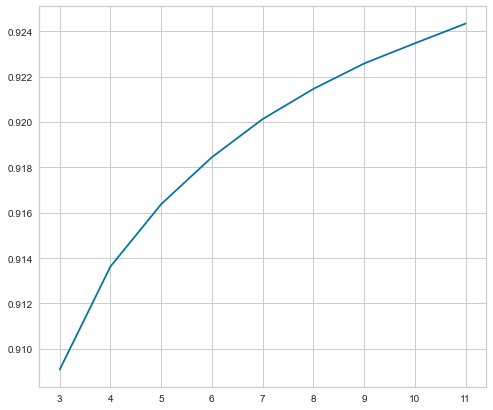

In [307]:
# train
plt.figure(figsize=(8,7))
plt.plot(max_depth, train, label='train')
plt.show();

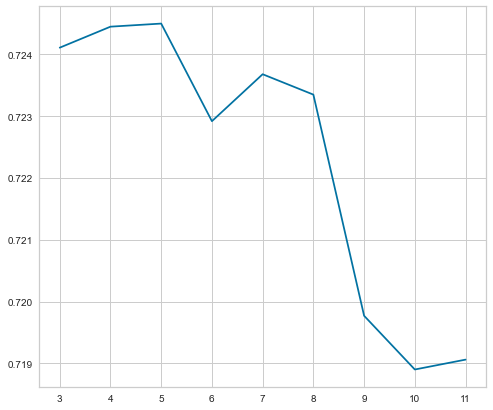

In [308]:
# test
plt.figure(figsize=(8,7))
plt.plot(max_depth, test, label = 'test')
plt.show(); 

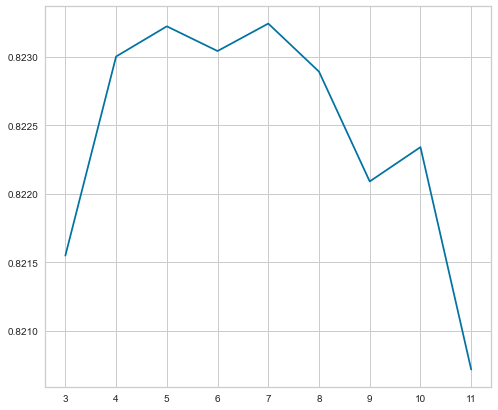

In [309]:
# val
plt.figure(figsize=(8,7))
plt.plot(max_depth, val, label='val')
plt.show(); 

> 5 ? 

<br><br><br>

<br><br><br>

### Experiment:  Iterating over learning rate

> Iterating over learning rate (leveraring GPU speed) ! 

In [213]:

print('Iterating over learning rate for understanding...')
start_time = time.time()
    
def QRF_i(df_train, df_val, df_test,model_features, incremental_lr):
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    # lock down everything but learning rate...
    
    xg = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=5,
    min_child_weight=4,
    gamma = 10,
    subsample=0.5,
    colsample_bytree = 0.5,
    reg_alpha = 100,
    reg_lambda = 1,
    n_estimators=2000,
    learning_rate= incremental_lr,
    seed=42, tree_method='gpu_hist', gpu_id=0)

    print('LEARNING RATE .......', incremental_lr)
    
    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    # print('--- Test Set ---')
    
    # print("Mean Absolute Error: ... %.2f" %  mean_absolute_error(y_test, y_pred_test))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_test, y_pred_test))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Test R^2:...... %.5f" %  r2_score(y_test, y_pred_test))
    # print('--- Val Set ---')
    # print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_val, y_pred_val))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_val, y_pred_val))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Val R^2:....... %.5f" %  r2_score(y_val, y_pred_val))
    # print('\n--- Train Set ---')
    # print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_train, y_pred_train))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_train, y_pred_train))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Train R^2:..... %.5f" %  r2_score(y_train, y_pred_train)) 
    
    #print('\nModel Hyperparameters Definitions:')

    #pprint(xg.get_params())
    
    #print(special_comments)
    
    # print("\n--- %s seconds ---" % round((time.time() - start_time)))

for ilr in [.10, .11, .12, .13, .14, .15, .16, .17, .18, .19, .20]:
    QRF_i(df_train, df_val, df_test,features_to_use_from_MM, ilr)

print("\n--- %s seconds ---" % round((time.time() - start_time)))   

Iterating over learning rate for understanding...
LEARNING RATE ....... 0.1
Test R^2:...... 0.72566
Val R^2:....... 0.82368
Train R^2:..... 0.91530
LEARNING RATE ....... 0.11
Test R^2:...... 0.72488
Val R^2:....... 0.82348
Train R^2:..... 0.91554
LEARNING RATE ....... 0.12
Test R^2:...... 0.72476
Val R^2:....... 0.82348
Train R^2:..... 0.91579
LEARNING RATE ....... 0.13
Test R^2:...... 0.72389
Val R^2:....... 0.82352
Train R^2:..... 0.91609
LEARNING RATE ....... 0.14
Test R^2:...... 0.72410
Val R^2:....... 0.82360
Train R^2:..... 0.91624
LEARNING RATE ....... 0.15
Test R^2:...... 0.72450
Val R^2:....... 0.82322
Train R^2:..... 0.91638
LEARNING RATE ....... 0.16
Test R^2:...... 0.72220
Val R^2:....... 0.82285
Train R^2:..... 0.91649
LEARNING RATE ....... 0.17
Test R^2:...... 0.72203
Val R^2:....... 0.82259
Train R^2:..... 0.91662
LEARNING RATE ....... 0.18
Test R^2:...... 0.72160
Val R^2:....... 0.82358
Train R^2:..... 0.91667
LEARNING RATE ....... 0.19
Test R^2:...... 0.72200
Val R^2:.

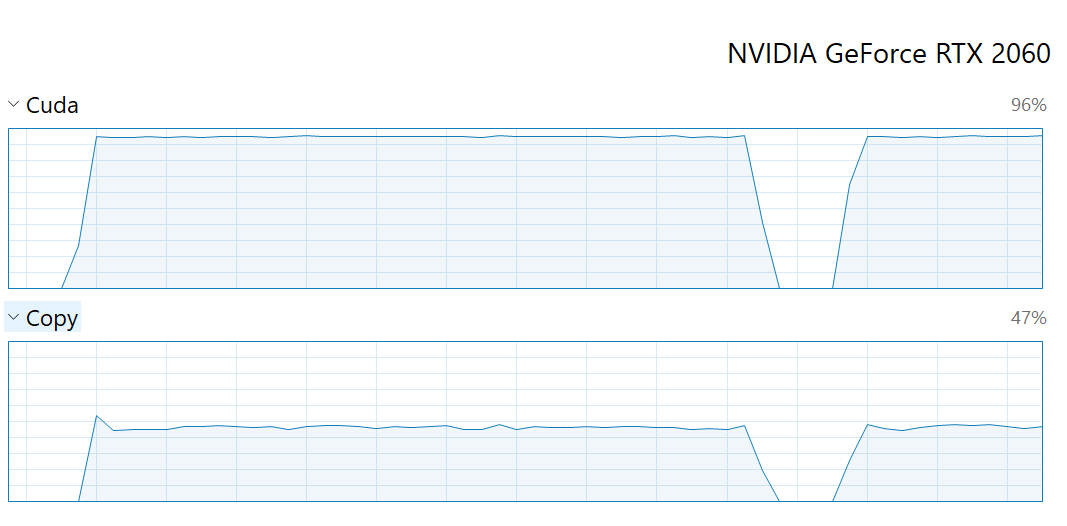

```
Iterating over learning rate for understanding...
LEARNING RATE ....... 0.1
Test R^2:...... 0.72566
Val R^2:....... 0.82368
Train R^2:..... 0.91530
LEARNING RATE ....... 0.11
Test R^2:...... 0.72488
Val R^2:....... 0.82348
Train R^2:..... 0.91554
LEARNING RATE ....... 0.12
Test R^2:...... 0.72476
Val R^2:....... 0.82348
Train R^2:..... 0.91579
LEARNING RATE ....... 0.13
Test R^2:...... 0.72389
Val R^2:....... 0.82352
Train R^2:..... 0.91609
LEARNING RATE ....... 0.14
Test R^2:...... 0.72410
Val R^2:....... 0.82360
Train R^2:..... 0.91624
LEARNING RATE ....... 0.15
Test R^2:...... 0.72450
Val R^2:....... 0.82322
Train R^2:..... 0.91638
LEARNING RATE ....... 0.16
Test R^2:...... 0.72220
Val R^2:....... 0.82285
Train R^2:..... 0.91649
LEARNING RATE ....... 0.17
Test R^2:...... 0.72203
Val R^2:....... 0.82259
Train R^2:..... 0.91662
LEARNING RATE ....... 0.18
Test R^2:...... 0.72160
Val R^2:....... 0.82358
Train R^2:..... 0.91667
LEARNING RATE ....... 0.19
Test R^2:...... 0.72200
Val R^2:....... 0.82312
Train R^2:..... 0.91680
LEARNING RATE ....... 0.2
Test R^2:...... 0.72424
Val R^2:....... 0.82271
Train R^2:..... 0.91692

--- 487 seconds ---
```

```
Iterating over learning rate for understanding...
LEARNING RATE ....... 0.1
Test R^2:...... 0.72566
Val R^2:....... 0.82368
Train R^2:..... 0.91530
LEARNING RATE ....... 0.11
Test R^2:...... 0.72488
Val R^2:....... 0.82348
Train R^2:..... 0.91554
LEARNING RATE ....... 0.12
Test R^2:...... 0.72476
Val R^2:....... 0.82348
Train R^2:..... 0.91579
LEARNING RATE ....... 0.13
Test R^2:...... 0.72389
Val R^2:....... 0.82352
Train R^2:..... 0.91609
LEARNING RATE ....... 0.14
Test R^2:...... 0.72410
Val R^2:....... 0.82360
Train R^2:..... 0.91624
LEARNING RATE ....... 0.15
Test R^2:...... 0.72450
Val R^2:....... 0.82322
Train R^2:..... 0.91638
LEARNING RATE ....... 0.16
Test R^2:...... 0.72220
Val R^2:....... 0.82285
Train R^2:..... 0.91649
LEARNING RATE ....... 0.17
Test R^2:...... 0.72203
Val R^2:....... 0.82259
Train R^2:..... 0.91662
LEARNING RATE ....... 0.18
Test R^2:...... 0.72160
Val R^2:....... 0.82358
Train R^2:..... 0.91667
LEARNING RATE ....... 0.19
Test R^2:...... 0.72200
Val R^2:....... 0.82312
Train R^2:..... 0.91680
LEARNING RATE ....... 0.2
Test R^2:...... 0.72424
Val R^2:....... 0.82271
Train R^2:..... 0.91692

--- 487 seconds ---
```

In [318]:

learning_rate = [.10, .11, .12, .13, .14, .15, .16, .17, .18, .19, .20]


train = [0.91530,
0.91554,
0.91579,
0.91609,
0.91624,
0.91638,
0.91649,
0.91662,
0.91667,
0.91680,
0.91692]


test = [0.72566,
0.72488,
0.72476,
0.72389,
0.72410,
0.72450,
0.72220,
0.72203,
0.72160,
0.72200,
0.72424]

val = [0.82368,
0.82348,
0.82348,
0.82352,
0.82360,
0.82322,
0.82285,
0.82259,
0.82358,
0.82312,
0.82271]

df = pd.DataFrame(list(zip(learning_rate, train, test, val)),
               columns =['learning_rate', "train", "test", "val"])

df


,learning_rate,train,test,val
0,0.10000,0.91530,0.72566,0.82368
1,0.11000,0.91554,0.72488,0.82348
2,0.12000,0.91579,0.72476,0.82348
3,0.13000,0.91609,0.72389,0.82352
4,0.14000,0.91624,0.72410,0.82360
5,0.15000,0.91638,0.72450,0.82322
6,0.16000,0.91649,0.72220,0.82285
7,0.17000,0.91662,0.72203,0.82259
8,0.18000,0.91667,0.72160,0.82358
9,0.19000,0.91680,0.72200,0.82312


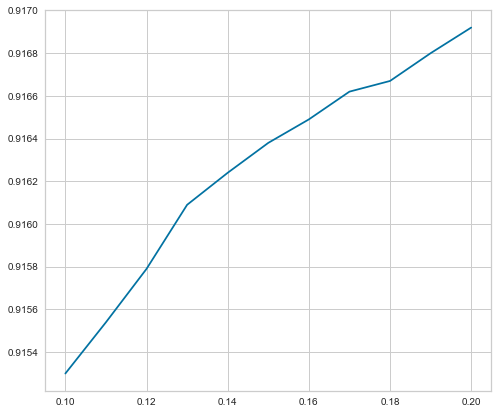

In [319]:
# train
plt.figure(figsize=(8,7))
plt.plot(learning_rate, train, label='train')
plt.show(); 

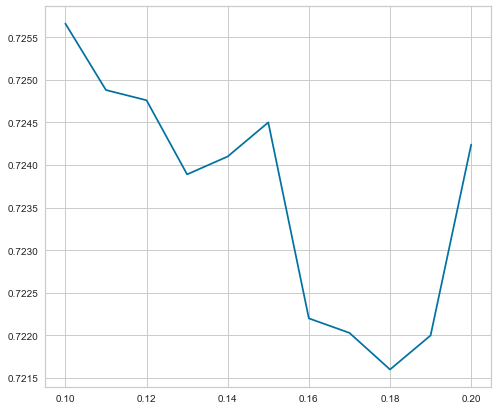

In [320]:
# test
plt.figure(figsize=(8,7))
plt.plot(learning_rate, test, label = 'test')
plt.show(); 

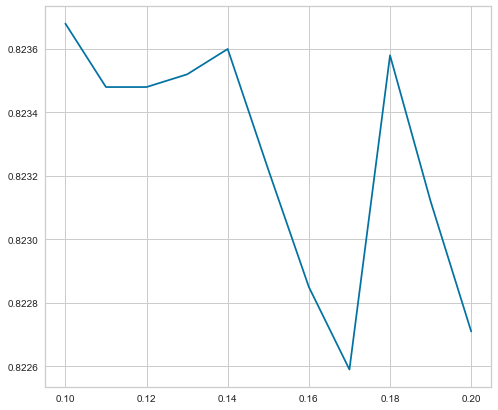

In [321]:
# val
plt.figure(figsize=(8,7))
plt.plot(learning_rate, val, label='val')
plt.show(); 

> 0.10 looks perfect... 

In [224]:

print('Iterating over learning rate AGAIN for understanding...')
start_time = time.time()
    
def QRF_i(df_train, df_val, df_test,model_features, incremental_lr):
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    # lock down everything but learning rate...
    
    xg = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=5,
    min_child_weight=4,
    gamma = 10,
    subsample=0.5,
    colsample_bytree = 0.5,
    reg_alpha = 100,
    reg_lambda = 1,
    n_estimators=2000,
    learning_rate= incremental_lr,
    seed=42, tree_method='gpu_hist', gpu_id=0)

    print('LEARNING RATE .......', incremental_lr)
    
    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    # print('--- Test Set ---')
    
    # print("Mean Absolute Error: ... %.2f" %  mean_absolute_error(y_test, y_pred_test))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_test, y_pred_test))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Test R^2:...... %.5f" %  r2_score(y_test, y_pred_test))
    # print('--- Val Set ---')
    # print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_val, y_pred_val))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_val, y_pred_val))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Val R^2:....... %.5f" %  r2_score(y_val, y_pred_val))
    # print('\n--- Train Set ---')
    # print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_train, y_pred_train))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_train, y_pred_train))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Train R^2:..... %.5f" %  r2_score(y_train, y_pred_train)) 
    
    #print('\nModel Hyperparameters Definitions:')

    #pprint(xg.get_params())
    
    #print(special_comments)
    
    # print("\n--- %s seconds ---" % round((time.time() - start_time)))

for ilr in [0.05, 0.08, .10, .20, 0.22, 0.25, 0.30]:
    QRF_i(df_train, df_val, df_test,features_to_use_from_MM, ilr)

print("\n--- %s seconds ---" % round((time.time() - start_time)))   

Iterating over learning rate AGAIN for understanding...
LEARNING RATE ....... 0.05
Test R^2:...... 0.72454
Val R^2:....... 0.82289
Train R^2:..... 0.91299
LEARNING RATE ....... 0.08
Test R^2:...... 0.72366
Val R^2:....... 0.82365
Train R^2:..... 0.91471
LEARNING RATE ....... 0.1
Test R^2:...... 0.72566
Val R^2:....... 0.82368
Train R^2:..... 0.91530
LEARNING RATE ....... 0.2
Test R^2:...... 0.72424
Val R^2:....... 0.82271
Train R^2:..... 0.91692
LEARNING RATE ....... 0.22
Test R^2:...... 0.72256
Val R^2:....... 0.82301
Train R^2:..... 0.91709
LEARNING RATE ....... 0.25
Test R^2:...... 0.72362
Val R^2:....... 0.82244
Train R^2:..... 0.91727
LEARNING RATE ....... 0.3
Test R^2:...... 0.72181
Val R^2:....... 0.82167
Train R^2:..... 0.91743

--- 304 seconds ---


```
Iterating over learning rate AGAIN for understanding...
LEARNING RATE ....... 0.05
Test R^2:...... 0.72454
Val R^2:....... 0.82289
Train R^2:..... 0.91299
LEARNING RATE ....... 0.08
Test R^2:...... 0.72366
Val R^2:....... 0.82365
Train R^2:..... 0.91471
LEARNING RATE ....... 0.1
Test R^2:...... 0.72566
Val R^2:....... 0.82368
Train R^2:..... 0.91530
LEARNING RATE ....... 0.2
Test R^2:...... 0.72424
Val R^2:....... 0.82271
Train R^2:..... 0.91692
LEARNING RATE ....... 0.22
Test R^2:...... 0.72256
Val R^2:....... 0.82301
Train R^2:..... 0.91709
LEARNING RATE ....... 0.25
Test R^2:...... 0.72362
Val R^2:....... 0.82244
Train R^2:..... 0.91727
LEARNING RATE ....... 0.3
Test R^2:...... 0.72181
Val R^2:....... 0.82167
Train R^2:..... 0.91743

--- 304 seconds ---
```

In [322]:


# these are not linear ! 
learning_rate = [0.05, 0.08, .10, .20, 0.22, 0.25, 0.30]

train = [0.91299, 0.91471, 0.91530, 0.91692, 0.91709, 
         0.91727, 0.91743]

test = [0.72454, 0.72366, 0.72566, 0.72424, 
        0.72256, 0.72362, 0.72181]

val = [0.82289, 0.82365, 0.82368, 0.82271, 
       0.82301, 0.82244, 0.82167]

df = pd.DataFrame(list(zip(learning_rate, train, test, val)),
               columns =['learning_rate', "train", "test", "val"])

df


,learning_rate,train,test,val
0,0.05000,0.91299,0.72454,0.82289
1,0.08000,0.91471,0.72366,0.82365
2,0.10000,0.91530,0.72566,0.82368
3,0.20000,0.91692,0.72424,0.82271
4,0.22000,0.91709,0.72256,0.82301
5,0.25000,0.91727,0.72362,0.82244
6,0.30000,0.91743,0.72181,0.82167


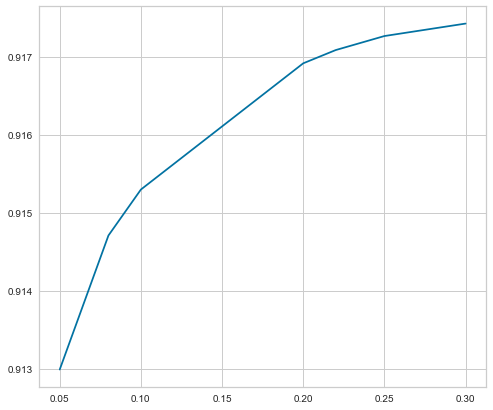

In [323]:
# train
plt.figure(figsize=(8,7))
plt.plot(learning_rate, train, label='train')
plt.show(); 

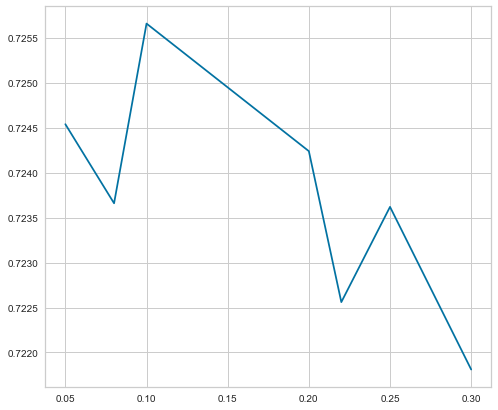

In [324]:
# test
plt.figure(figsize=(8,7))
plt.plot(learning_rate, test, label = 'test')
plt.show(); 

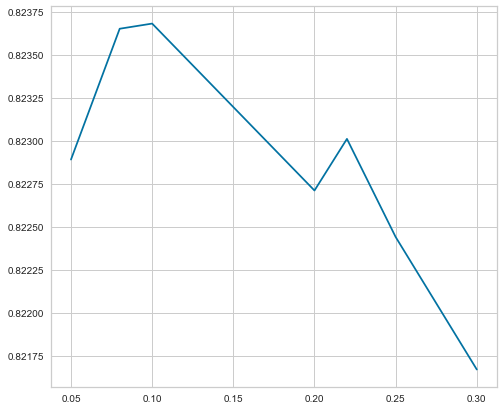

In [326]:
# val
plt.figure(figsize=(8,7))
plt.plot(learning_rate, val, label='val')
plt.show(); 

> **more approximate proof that 0.10 is a good learning rate...**

<br><br><br>

<br><br><br>

### Experiment:  Iterating over min_child_weight


> Iterating over min_child_weight (leveraring GPU speed) ! 

In [273]:
    
print('Iterating over min_child_weight for understanding...')

start_time = time.time()
    
def QRF_i(df_train, df_val, df_test,model_features, incremental_min_cw):
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    # lock down everything but min_child_weight
    
    xg = xgb.XGBRegressor(
    
    objective='reg:squarederror',
        
    min_child_weight= incremental_min_cw,   
    
    gamma = 8, 
        
    subsample=0.5,  colsample_bytree = 0.5,
    
    # reg_alpha = 100,  reg_lambda = 1,  default for now 
        
    max_depth=5,  # going to try 4 here for experimentation.  
    #               later i will find out that 3 and 5 are pretty good. 
        
    n_estimators=3000, learning_rate= 0.10,
        
    seed=42, tree_method='gpu_hist', gpu_id=0)

    print('min_child_weight .......', incremental_min_cw)
    
    xg.fit(X_train, y_train)
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    print("Test R^2:...... %.5f" %  r2_score(y_test, y_pred_test))
    print("Val R^2:....... %.5f" %  r2_score(y_val, y_pred_val))
    print("Train R^2:..... %.5f" %  r2_score(y_train, y_pred_train)) 
    
   
for icw in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    QRF_i(df_train, df_val, df_test,features_to_use_from_MM, icw)

print("\n--- %s seconds ---" % round((time.time() - start_time)))   

Iterating over min_child_weight for understanding...
min_child_weight ....... 0
Test R^2:...... 0.72121
Val R^2:....... 0.82265
Train R^2:..... 0.91793
min_child_weight ....... 1
Test R^2:...... 0.72121
Val R^2:....... 0.82265
Train R^2:..... 0.91793
min_child_weight ....... 2
Test R^2:...... 0.72392
Val R^2:....... 0.82262
Train R^2:..... 0.91781
min_child_weight ....... 3
Test R^2:...... 0.72172
Val R^2:....... 0.82256
Train R^2:..... 0.91758
min_child_weight ....... 4
Test R^2:...... 0.72426
Val R^2:....... 0.82304
Train R^2:..... 0.91745
min_child_weight ....... 5
Test R^2:...... 0.72151
Val R^2:....... 0.82317
Train R^2:..... 0.91730
min_child_weight ....... 6
Test R^2:...... 0.72373
Val R^2:....... 0.82286
Train R^2:..... 0.91727
min_child_weight ....... 7
Test R^2:...... 0.72253
Val R^2:....... 0.82260
Train R^2:..... 0.91713
min_child_weight ....... 8
Test R^2:...... 0.72616
Val R^2:....... 0.82261
Train R^2:..... 0.91702
min_child_weight ....... 9
Test R^2:...... 0.72325
Val R

In [327]:

# these are linear 

min_child_weight = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


train = [0.91793,
0.91793,
0.91781,
0.91758,
0.91745,
0.91730,
0.91727,
0.91713,
0.91702,
0.91696,
0.91688]

test = [0.72121,
0.72121,
0.72392,
0.72172,
0.72426,
0.72151,
0.72373,
0.72253,
0.72616,
0.72325,
0.72354]

val = [0.82265,
0.82265,
0.82262,
0.82256,
0.82304,
0.82317,
0.82286,
0.82260,
0.82261,
0.82284,
0.82261]


df = pd.DataFrame(list(zip(min_child_weight, train, test, val)),
               columns =['min_child_weight', "train", "test", "val"])

df


,min_child_weight,train,test,val
0,0,0.91793,0.72121,0.82265
1,1,0.91793,0.72121,0.82265
2,2,0.91781,0.72392,0.82262
3,3,0.91758,0.72172,0.82256
4,4,0.91745,0.72426,0.82304
5,5,0.91730,0.72151,0.82317
6,6,0.91727,0.72373,0.82286
7,7,0.91713,0.72253,0.82260
8,8,0.91702,0.72616,0.82261
9,9,0.91696,0.72325,0.82284


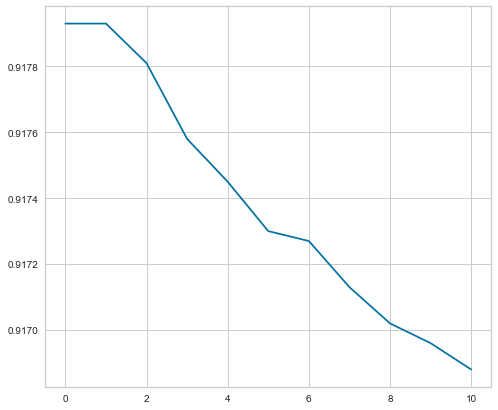

In [328]:
# train
plt.figure(figsize=(8,7))
plt.plot(min_child_weight, train, label='train')
plt.show(); 

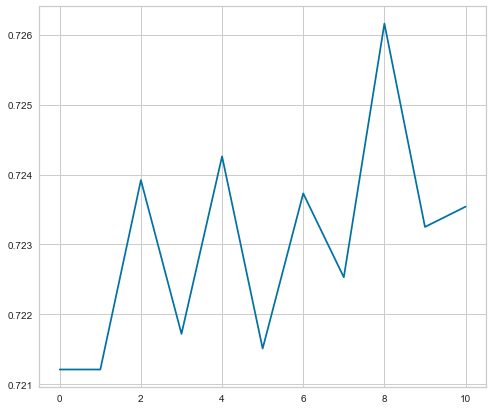

In [329]:
# test
plt.figure(figsize=(8,7))
plt.plot(min_child_weight, test, label = 'test')
plt.show(); 

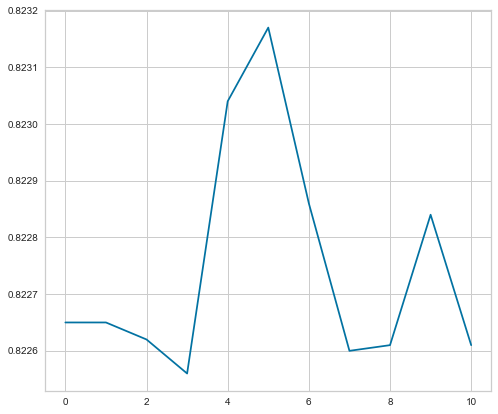

In [330]:
# val
plt.figure(figsize=(8,7))
plt.plot(min_child_weight, val, label='val')
plt.show(); 

> high level, looks like min_child_weight may be in the arena from 5-8 ballpark...or possibly 4 fits both val and test use cases (compromise)

<br><br><br>

<br><br><br>

### Experiment:  Iterating over gamma

> Iterating over gamma (leveraring GPU speed) ! set higher n_est value because i have some horsepower) 

In [229]:
    
print('Iterating over gamma for understanding...')

start_time = time.time()
    
def QRF_i(df_train, df_val, df_test,model_features, incremental_gamma):
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    # lock down everything but gamma
    
    xg = xgb.XGBRegressor(
    objective='reg:squarederror',
    min_child_weight=4,   
    gamma = incremental_gamma,
    subsample=0.5,
    colsample_bytree = 0.5,
    reg_alpha = 100,
    reg_lambda = 1,
    max_depth=5,   # note:  not 3 ! so limited effect here possibly 
    n_estimators=2500,  # upping this because i have the processing power
    learning_rate= 0.10,
    seed=42, tree_method='gpu_hist', gpu_id=0)

    print('GAMMA .......', incremental_gamma)
    
    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    # print('--- Test Set ---')
    
    # print("Mean Absolute Error: ... %.2f" %  mean_absolute_error(y_test, y_pred_test))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_test, y_pred_test))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Test R^2:...... %.5f" %  r2_score(y_test, y_pred_test))
    # print('--- Val Set ---')
    # print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_val, y_pred_val))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_val, y_pred_val))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Val R^2:....... %.5f" %  r2_score(y_val, y_pred_val))
    # print('\n--- Train Set ---')
    # print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_train, y_pred_train))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_train, y_pred_train))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Train R^2:..... %.5f" %  r2_score(y_train, y_pred_train)) 
    
    #print('\nModel Hyperparameters Definitions:')

    #pprint(xg.get_params())
    
    #print(special_comments)
    
    # print("\n--- %s seconds ---" % round((time.time() - start_time)))

for ig in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    QRF_i(df_train, df_val, df_test,features_to_use_from_MM, ig)

print("\n--- %s seconds ---" % round((time.time() - start_time)))   

Iterating over gamma for understanding...
GAMMA ....... 0
Test R^2:...... 0.72453
Val R^2:....... 0.82328
Train R^2:..... 0.91608
GAMMA ....... 1
Test R^2:...... 0.72531
Val R^2:....... 0.82348
Train R^2:..... 0.91605
GAMMA ....... 2
Test R^2:...... 0.72509
Val R^2:....... 0.82338
Train R^2:..... 0.91602
GAMMA ....... 3
Test R^2:...... 0.72469
Val R^2:....... 0.82364
Train R^2:..... 0.91609
GAMMA ....... 4
Test R^2:...... 0.72521
Val R^2:....... 0.82353
Train R^2:..... 0.91606
GAMMA ....... 5
Test R^2:...... 0.72408
Val R^2:....... 0.82352
Train R^2:..... 0.91604
GAMMA ....... 6
Test R^2:...... 0.72536
Val R^2:....... 0.82331
Train R^2:..... 0.91605
GAMMA ....... 7
Test R^2:...... 0.72493
Val R^2:....... 0.82335
Train R^2:..... 0.91606
GAMMA ....... 8
Test R^2:...... 0.72521
Val R^2:....... 0.82381
Train R^2:..... 0.91609
GAMMA ....... 9
Test R^2:...... 0.72528
Val R^2:....... 0.82354
Train R^2:..... 0.91596
GAMMA ....... 10
Test R^2:...... 0.72548
Val R^2:....... 0.82356
Train R^2:...

```

results: 

Iterating over gamma for understanding...
GAMMA ....... 0
Test R^2:...... 0.72453
Val R^2:....... 0.82328
Train R^2:..... 0.91608
GAMMA ....... 1
Test R^2:...... 0.72531
Val R^2:....... 0.82348
Train R^2:..... 0.91605
GAMMA ....... 2
Test R^2:...... 0.72509
Val R^2:....... 0.82338
Train R^2:..... 0.91602
GAMMA ....... 3
Test R^2:...... 0.72469
Val R^2:....... 0.82364
Train R^2:..... 0.91609
GAMMA ....... 4
Test R^2:...... 0.72521
Val R^2:....... 0.82353
Train R^2:..... 0.91606
GAMMA ....... 5
Test R^2:...... 0.72408
Val R^2:....... 0.82352
Train R^2:..... 0.91604
GAMMA ....... 6
Test R^2:...... 0.72536
Val R^2:....... 0.82331
Train R^2:..... 0.91605
GAMMA ....... 7
Test R^2:...... 0.72493
Val R^2:....... 0.82335
Train R^2:..... 0.91606
GAMMA ....... 8
Test R^2:...... 0.72521
Val R^2:....... 0.82381
Train R^2:..... 0.91609
GAMMA ....... 9
Test R^2:...... 0.72528
Val R^2:....... 0.82354
Train R^2:..... 0.91596
GAMMA ....... 10
Test R^2:...... 0.72548
Val R^2:....... 0.82356
Train R^2:..... 0.91598
GAMMA ....... 11
Test R^2:...... 0.72460
Val R^2:....... 0.82354
Train R^2:..... 0.91606
GAMMA ....... 12
Test R^2:...... 0.72500
Val R^2:....... 0.82371
Train R^2:..... 0.91600
GAMMA ....... 13
Test R^2:...... 0.72461
Val R^2:....... 0.82358
Train R^2:..... 0.91604
GAMMA ....... 14
Test R^2:...... 0.72391
Val R^2:....... 0.82296
Train R^2:..... 0.91597
GAMMA ....... 15
Test R^2:...... 0.72458
Val R^2:....... 0.82351
Train R^2:..... 0.91598

--- 882 seconds ---
```

In [331]:

# these are linear 

gamma = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

train = [0.91608,
0.91605,
0.91602,
0.91609,
0.91606,
0.91604,
0.91605,
0.91606,
0.91609,
0.91596,
0.91598,
0.91606,
0.91600,
0.91604,
0.91597,
0.91598]

test = [0.72453,
0.72531,
0.72509,
0.72469,
0.72521,
0.72408,
0.72536,
0.72493,
0.72521,
0.72528,
0.72548,
0.72460,
0.72500,
0.72461,
0.72391,
0.72458]

val = [0.82328,
0.82348,
0.82338,
0.82364,
0.82353,
0.82352,
0.82331,
0.82335,
0.82381,
0.82354,
0.82356,
0.82354,
0.82371,
0.82358,
0.82296,
0.82351]

df = pd.DataFrame(list(zip(gamma, train, test, val)),
               columns =['gamma', "train", "test", "val"])

df


,gamma,train,test,val
0,0,0.91608,0.72453,0.82328
1,1,0.91605,0.72531,0.82348
2,2,0.91602,0.72509,0.82338
3,3,0.91609,0.72469,0.82364
4,4,0.91606,0.72521,0.82353
5,5,0.91604,0.72408,0.82352
6,6,0.91605,0.72536,0.82331
7,7,0.91606,0.72493,0.82335
8,8,0.91609,0.72521,0.82381
9,9,0.91596,0.72528,0.82354


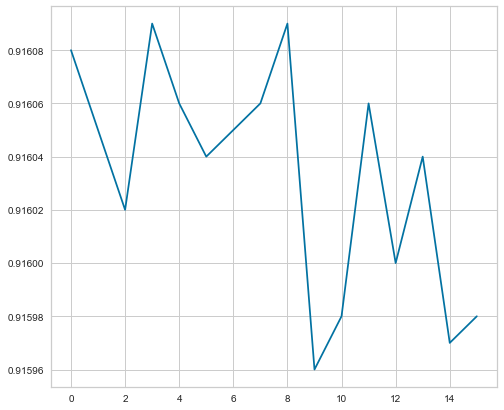

In [332]:
# train
plt.figure(figsize=(8,7))
plt.plot(gamma, train, label='train')
plt.show();

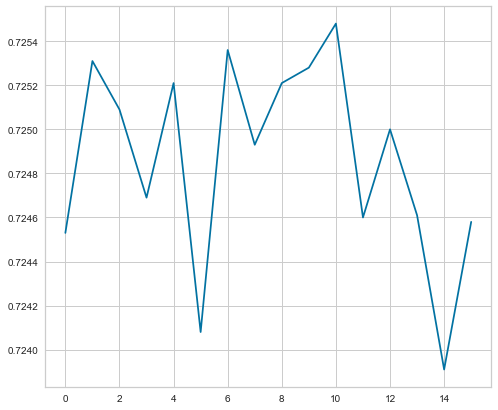

In [333]:
# test
plt.figure(figsize=(8,7))
plt.plot(gamma, test, label = 'test')
plt.show(); 

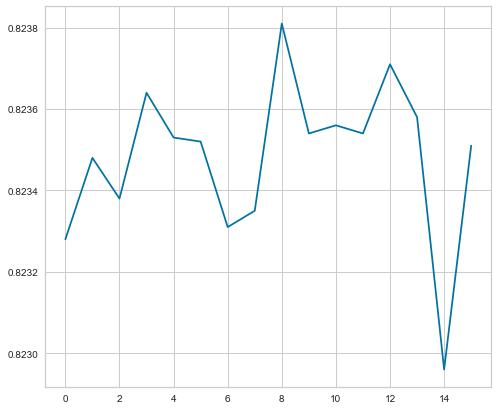

In [334]:
# val
plt.figure(figsize=(8,7))
plt.plot(gamma, val, label='val')
plt.show(); 

> more approximate proof that gamma from 8 to 10 is good ? 

In [242]:

# another run 

#  MAYBE SEE WHAT HAPPENS WHEN YOU NEED more gamma ?

#  i.e. if your max_depth was 3 (not 5), try that out, and see 
#  what happens to your values...


In [235]:
    
print('Iterating over gamma (with my max_depth = 3, for understanding...')

start_time = time.time()
    
def QRF_i(df_train, df_val, df_test,model_features, incremental_gamma):
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    # lock down everything but gamma
    
    xg = xgb.XGBRegressor(
    objective='reg:squarederror',
    min_child_weight=4,   
    gamma = incremental_gamma,
    subsample=0.5,
    colsample_bytree = 0.5,
    reg_alpha = 100,
    reg_lambda = 1,
    max_depth= 3,  # setting to 3 on purpose !  
    n_estimators=2500,
    learning_rate= 0.10,
    seed=42, tree_method='gpu_hist', gpu_id=0)

    print('GAMMA .......', incremental_gamma)
    
    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    # print('--- Test Set ---')
    
    # print("Mean Absolute Error: ... %.2f" %  mean_absolute_error(y_test, y_pred_test))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_test, y_pred_test))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Test R^2:...... %.5f" %  r2_score(y_test, y_pred_test))
    # print('--- Val Set ---')
    # print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_val, y_pred_val))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_val, y_pred_val))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Val R^2:....... %.5f" %  r2_score(y_val, y_pred_val))
    # print('\n--- Train Set ---')
    # print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_train, y_pred_train))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_train, y_pred_train))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Train R^2:..... %.5f" %  r2_score(y_train, y_pred_train)) 
    
    #print('\nModel Hyperparameters Definitions:')

    #pprint(xg.get_params())
    
    #print(special_comments)
    
    # print("\n--- %s seconds ---" % round((time.time() - start_time)))

for ig in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    QRF_i(df_train, df_val, df_test,features_to_use_from_MM, ig)

print("\n--- %s seconds ---" % round((time.time() - start_time)))   

Iterating over gamma (with my max_depth = 3, for understanding...
GAMMA ....... 0
Test R^2:...... 0.72420
Val R^2:....... 0.82068
Train R^2:..... 0.90845
GAMMA ....... 1
Test R^2:...... 0.72397
Val R^2:....... 0.82064
Train R^2:..... 0.90849
GAMMA ....... 2
Test R^2:...... 0.72408
Val R^2:....... 0.82042
Train R^2:..... 0.90845
GAMMA ....... 3
Test R^2:...... 0.72421
Val R^2:....... 0.82031
Train R^2:..... 0.90843
GAMMA ....... 4
Test R^2:...... 0.72432
Val R^2:....... 0.82047
Train R^2:..... 0.90848
GAMMA ....... 5
Test R^2:...... 0.72457
Val R^2:....... 0.82058
Train R^2:..... 0.90848
GAMMA ....... 6
Test R^2:...... 0.72425
Val R^2:....... 0.82055
Train R^2:..... 0.90850
GAMMA ....... 7
Test R^2:...... 0.72372
Val R^2:....... 0.82029
Train R^2:..... 0.90845
GAMMA ....... 8
Test R^2:...... 0.72428
Val R^2:....... 0.82067
Train R^2:..... 0.90845
GAMMA ....... 9
Test R^2:...... 0.72391
Val R^2:....... 0.82037
Train R^2:..... 0.90840
GAMMA ....... 10
Test R^2:...... 0.72505
Val R^2:.....

```
results: 

Iterating over gamma (with my max_depth = 3, for understanding...
GAMMA ....... 0
Test R^2:...... 0.72420
Val R^2:....... 0.82068
Train R^2:..... 0.90845
GAMMA ....... 1
Test R^2:...... 0.72397
Val R^2:....... 0.82064
Train R^2:..... 0.90849
GAMMA ....... 2
Test R^2:...... 0.72408
Val R^2:....... 0.82042
Train R^2:..... 0.90845
GAMMA ....... 3
Test R^2:...... 0.72421
Val R^2:....... 0.82031
Train R^2:..... 0.90843
GAMMA ....... 4
Test R^2:...... 0.72432
Val R^2:....... 0.82047
Train R^2:..... 0.90848
GAMMA ....... 5
Test R^2:...... 0.72457
Val R^2:....... 0.82058
Train R^2:..... 0.90848
GAMMA ....... 6
Test R^2:...... 0.72425
Val R^2:....... 0.82055
Train R^2:..... 0.90850
GAMMA ....... 7
Test R^2:...... 0.72372
Val R^2:....... 0.82029
Train R^2:..... 0.90845
GAMMA ....... 8
Test R^2:...... 0.72428
Val R^2:....... 0.82067
Train R^2:..... 0.90845
GAMMA ....... 9
Test R^2:...... 0.72391
Val R^2:....... 0.82037
Train R^2:..... 0.90840
GAMMA ....... 10
Test R^2:...... 0.72505
Val R^2:....... 0.82065
Train R^2:..... 0.90843
GAMMA ....... 11
Test R^2:...... 0.72515
Val R^2:....... 0.82065
Train R^2:..... 0.90843
GAMMA ....... 12
Test R^2:...... 0.72489
Val R^2:....... 0.82041
Train R^2:..... 0.90839
GAMMA ....... 13
Test R^2:...... 0.72496
Val R^2:....... 0.82048
Train R^2:..... 0.90841
GAMMA ....... 14
Test R^2:...... 0.72507
Val R^2:....... 0.82042
Train R^2:..... 0.90841
GAMMA ....... 15
Test R^2:...... 0.72495
Val R^2:....... 0.82037
Train R^2:..... 0.90838

--- 586 seconds ---
```

In [335]:



# these are linear 

gamma = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

train = [0.90845,
0.90849,
0.90845,
0.90843,
0.90848,
0.90848,
0.90850,
0.90845,
0.90845,
0.90840,
0.90843,
0.90843,
0.90839,
0.90841,
0.90841,
0.90838]
         
test = [0.72420,
0.72397,
0.72408,
0.72421,
0.72432,
0.72457,
0.72425,
0.72372,
0.72428,
0.72391,
0.72505,
0.72515,
0.72489,
0.72496,
0.72507,
0.72495]
        
val = [0.82068,
0.82064,
0.82042,
0.82031,
0.82047,
0.82058,
0.82055,
0.82029,
0.82067,
0.82037,
0.82065,
0.82065,
0.82041,
0.82048,
0.82042,
0.82037]
       
df = pd.DataFrame(list(zip(gamma, train, test, val)),
               columns =['gamma', "train", "test", "val"])

df


,gamma,train,test,val
0,0,0.90845,0.72420,0.82068
1,1,0.90849,0.72397,0.82064
2,2,0.90845,0.72408,0.82042
3,3,0.90843,0.72421,0.82031
4,4,0.90848,0.72432,0.82047
5,5,0.90848,0.72457,0.82058
6,6,0.90850,0.72425,0.82055
7,7,0.90845,0.72372,0.82029
8,8,0.90845,0.72428,0.82067
9,9,0.90840,0.72391,0.82037


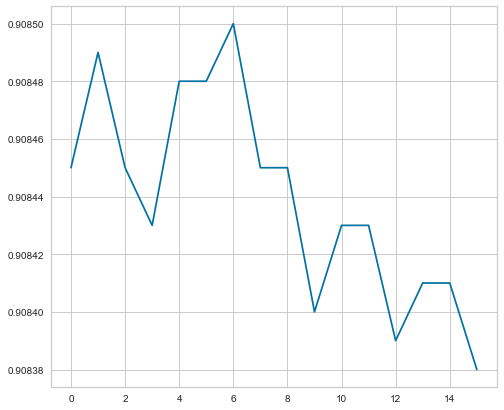

In [336]:
# train
plt.figure(figsize=(8,7))
plt.plot(gamma, train, label='train')
plt.show();

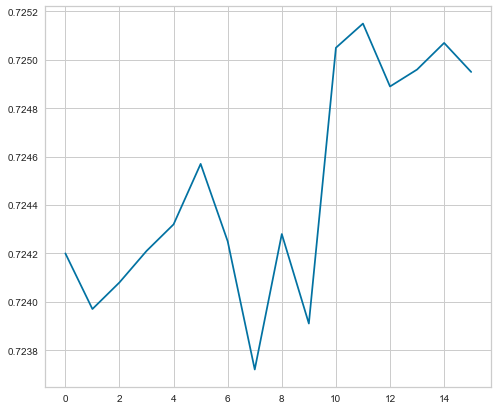

In [337]:
# test
plt.figure(figsize=(8,7))
plt.plot(gamma, test, label = 'test')
plt.show(); 

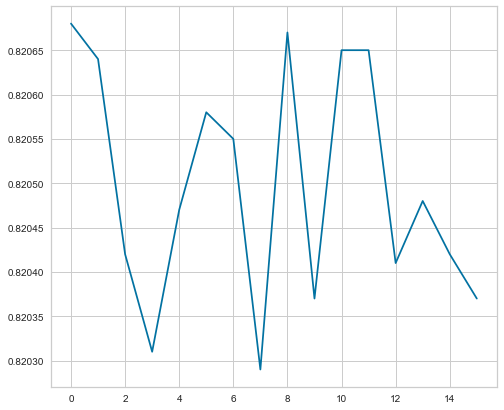

In [338]:
# val
plt.figure(figsize=(8,7))
plt.plot(gamma, val, label='val')
plt.show(); 

> approximate proof that gamma from 10 to 11 is good ?  IF you have a lower max_depth like 3 in this case... either way, we can see where things are peaking.. makes sense...

<br><br><br>

<br><br><br>

### Experiment:  Iterating over subsample 

> Iterating over subsample (leveraring GPU speed) ! 

GOLDENMONKEY

In [293]:
    
print('Iterating over subsample for understanding...')
print('gamma is 10, max_depth is 5, learning_rate is .10\n')

start_time = time.time()
    
def QRF_i(df_train, df_val, df_test,model_features, incremental_ss):
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    # lock down everything but subsample
    
    xg = xgb.XGBRegressor(
    objective='reg:squarederror',
    min_child_weight=4,   
    gamma = 10, 
    subsample = incremental_ss,
    colsample_bytree = 0.5,
    reg_alpha = 100,
    reg_lambda = 1,
    max_depth=5,   # setting max_depth = 5.  
    n_estimators=3100,
    learning_rate= 0.10,
    seed=42, tree_method='gpu_hist', gpu_id=0)

    print('SUBSAMPLE .......', incremental_ss)
    
    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    # print('--- Test Set ---')
    
    # print("Mean Absolute Error: ... %.2f" %  mean_absolute_error(y_test, y_pred_test))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_test, y_pred_test))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Test R^2:...... %.5f" %  r2_score(y_test, y_pred_test))
    # print('--- Val Set ---')
    # print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_val, y_pred_val))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_val, y_pred_val))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Val R^2:....... %.5f" %  r2_score(y_val, y_pred_val))
    # print('\n--- Train Set ---')
    # print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_train, y_pred_train))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_train, y_pred_train))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Train R^2:..... %.5f" %  r2_score(y_train, y_pred_train)) 
    print("")
    
    #print('\nModel Hyperparameters Definitions:')

    #pprint(xg.get_params())
    
    #print(special_comments)
    
    # print("\n--- %s seconds ---" % round((time.time() - start_time)))

for iss in [.5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1]:
    QRF_i(df_train, df_val, df_test,features_to_use_from_MM, iss)

print("\n--- %s seconds ---" % round((time.time() - start_time)))  


Iterating over subsample for understanding...
gamma is 10, max_depth is 5, learning_rate is .10

SUBSAMPLE ....... 0.5
Test R^2:...... 0.72574
Val R^2:....... 0.82355
Train R^2:..... 0.91658

SUBSAMPLE ....... 0.55
Test R^2:...... 0.72506
Val R^2:....... 0.82357
Train R^2:..... 0.91686

SUBSAMPLE ....... 0.6
Test R^2:...... 0.72422
Val R^2:....... 0.82368
Train R^2:..... 0.91711

SUBSAMPLE ....... 0.65
Test R^2:...... 0.72447
Val R^2:....... 0.82344
Train R^2:..... 0.91737

SUBSAMPLE ....... 0.7
Test R^2:...... 0.72600
Val R^2:....... 0.82405
Train R^2:..... 0.91760

SUBSAMPLE ....... 0.75
Test R^2:...... 0.72560
Val R^2:....... 0.82399
Train R^2:..... 0.91780

SUBSAMPLE ....... 0.8
Test R^2:...... 0.72527
Val R^2:....... 0.82455
Train R^2:..... 0.91814

SUBSAMPLE ....... 0.85
Test R^2:...... 0.72496
Val R^2:....... 0.82385
Train R^2:..... 0.91839

SUBSAMPLE ....... 0.9
Test R^2:...... 0.72619
Val R^2:....... 0.82441
Train R^2:..... 0.91874

SUBSAMPLE ....... 0.95
Test R^2:...... 0.724


```
Iterating over subsample for understanding...
gamma is 10, max_depth is 5, learning_rate is .10

SUBSAMPLE ....... 0.5
Test R^2:...... 0.72574
Val R^2:....... 0.82355
Train R^2:..... 0.91658

SUBSAMPLE ....... 0.55
Test R^2:...... 0.72506
Val R^2:....... 0.82357
Train R^2:..... 0.91686

SUBSAMPLE ....... 0.6
Test R^2:...... 0.72422
Val R^2:....... 0.82368
Train R^2:..... 0.91711

SUBSAMPLE ....... 0.65
Test R^2:...... 0.72447
Val R^2:....... 0.82344
Train R^2:..... 0.91737

SUBSAMPLE ....... 0.7
Test R^2:...... 0.72600
Val R^2:....... 0.82405
Train R^2:..... 0.91760

SUBSAMPLE ....... 0.75
Test R^2:...... 0.72560
Val R^2:....... 0.82399
Train R^2:..... 0.91780

SUBSAMPLE ....... 0.8
Test R^2:...... 0.72527
Val R^2:....... 0.82455
Train R^2:..... 0.91814

SUBSAMPLE ....... 0.85
Test R^2:...... 0.72496
Val R^2:....... 0.82385
Train R^2:..... 0.91839

SUBSAMPLE ....... 0.9
Test R^2:...... 0.72619
Val R^2:....... 0.82441
Train R^2:..... 0.91874

SUBSAMPLE ....... 0.95
Test R^2:...... 0.72431
Val R^2:....... 0.82425
Train R^2:..... 0.91893

SUBSAMPLE ....... 1
Test R^2:...... 0.72574
Val R^2:....... 0.82354
Train R^2:..... 0.91321


--- 939 seconds ---
```


In [339]:


subsample = [.5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1]

train = [0.91658,
0.91686,
0.91711,
0.91737,
0.91760,
0.91780,
0.91814,
0.91839,
0.91874,
0.91893,
0.91321]

         
test = [0.72574,
0.72506,
0.72422,
0.72447,
0.72600,
0.72560,
0.72527,
0.72496,
0.72619,
0.72431,
0.72574]

val = [0.82355,
0.82357,
0.82368,
0.82344,
0.82405,
0.82399,
0.82455,
0.82385,
0.82441,
0.82425,
0.82354]

 
df = pd.DataFrame(list(zip(subsample, train, test, val)),
               columns =['subsample', "train", "test", "val"])

df


,subsample,train,test,val
0,0.50000,0.91658,0.72574,0.82355
1,0.55000,0.91686,0.72506,0.82357
2,0.60000,0.91711,0.72422,0.82368
3,0.65000,0.91737,0.72447,0.82344
4,0.70000,0.91760,0.72600,0.82405
5,0.75000,0.91780,0.72560,0.82399
6,0.80000,0.91814,0.72527,0.82455
7,0.85000,0.91839,0.72496,0.82385
8,0.90000,0.91874,0.72619,0.82441
9,0.95000,0.91893,0.72431,0.82425


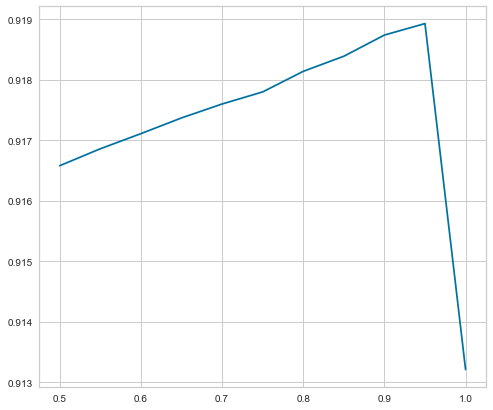

In [340]:
# train
plt.figure(figsize=(8,7))
plt.plot(subsample, train, label='train')
plt.show();

GOLDENMONKEY

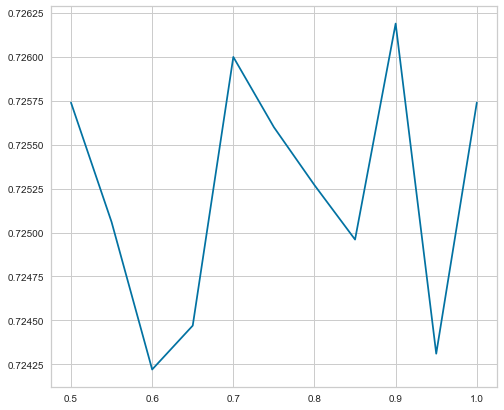

In [341]:
# test
plt.figure(figsize=(8,7))
plt.plot(subsample, test, label = 'test')
plt.show(); 

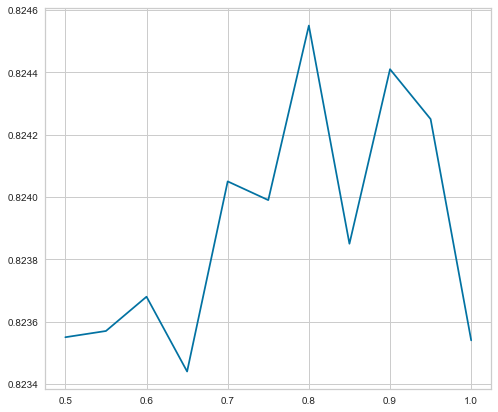

In [342]:
# val
plt.figure(figsize=(8,7))
plt.plot(subsample, val, label='val')
plt.show(); 

> THIS IS WHY I WAS INCREASE THE SUBSAMPLE, I DONT THINK .5 IS ENOUGH. i THINK IT SHOULD BE HIGHER...

STOP FOR A SECOND. 

LETS PUT THINGS BACK TO THEIR DEFAULT HYPERPARAMETERS, AND REDO THIS TEST ! 

I WANT TO INCREMENT SUBSAMPLE FROM 0.5 TO 1, BUT KEEP MY DEFAULT PARAMETERS OTHERWISE... MAYBE MY ALPHA IS TOO HIGH AT THIS POINT ? 

In [265]:
    
print('Iterating over subsample for understanding...')
print('default parameters !')
print('you will want to check this out...')

start_time = time.time()
    
def QRF_i(df_train, df_val, df_test,model_features, incremental_ss):
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    
    # lock down everything but sub-sample
    
    xg = xgb.XGBRegressor(
    objective='reg:squarederror',
    
    subsample = incremental_ss,
        
    n_estimators=2500,
    seed=42, tree_method='gpu_hist', gpu_id=0)

    print('SUBSAMPLE .......', incremental_ss)
    
    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    # print('--- Test Set ---')
    
    # print("Mean Absolute Error: ... %.2f" %  mean_absolute_error(y_test, y_pred_test))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_test, y_pred_test))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Test R^2:...... %.5f" %  r2_score(y_test, y_pred_test))
    # print('--- Val Set ---')
    # print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_val, y_pred_val))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_val, y_pred_val))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Val R^2:....... %.5f" %  r2_score(y_val, y_pred_val))
    # print('\n--- Train Set ---')
    # print('Mean Absolute Error: ... %.2f' %  mean_absolute_error(y_train, y_pred_train))
    # print("Mean Squared Error:..... %.2f" %  mean_squared_error(y_train, y_pred_train))
    # print('RMSE: .................. %.2f' %  np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Train R^2:..... %.5f" %  r2_score(y_train, y_pred_train)) 
    print("")
    
    #print('\nModel Hyperparameters Definitions:')

    #pprint(xg.get_params())
    
    #print(special_comments)
    
    # print("\n--- %s seconds ---" % round((time.time() - start_time)))

for iss in [.5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1]:
    QRF_i(df_train, df_val, df_test,features_to_use_from_MM, iss)

print("\n--- %s seconds ---" % round((time.time() - start_time)))  


Iterating over subsample for understanding...
default parameters !
you will want to check this out...
SUBSAMPLE ....... 0.5
Test R^2:...... 0.70632
Val R^2:....... 0.81388
Train R^2:..... 0.92150

SUBSAMPLE ....... 0.55
Test R^2:...... 0.70908
Val R^2:....... 0.81527
Train R^2:..... 0.92190

SUBSAMPLE ....... 0.6
Test R^2:...... 0.71147
Val R^2:....... 0.81768
Train R^2:..... 0.92236

SUBSAMPLE ....... 0.65
Test R^2:...... 0.70649
Val R^2:....... 0.81449
Train R^2:..... 0.92282

SUBSAMPLE ....... 0.7
Test R^2:...... 0.71319
Val R^2:....... 0.81769
Train R^2:..... 0.92321

SUBSAMPLE ....... 0.75
Test R^2:...... 0.71195
Val R^2:....... 0.81612
Train R^2:..... 0.92368

SUBSAMPLE ....... 0.8
Test R^2:...... 0.71362
Val R^2:....... 0.81851
Train R^2:..... 0.92409

SUBSAMPLE ....... 0.85
Test R^2:...... 0.71226
Val R^2:....... 0.81758
Train R^2:..... 0.92467

SUBSAMPLE ....... 0.9
Test R^2:...... 0.71306
Val R^2:....... 0.81706
Train R^2:..... 0.92518

SUBSAMPLE ....... 0.95
Test R^2:...... 

```

Iterating over subsample for understanding...
default parameters !
you will want to check this out...
SUBSAMPLE ....... 0.5
Test R^2:...... 0.70632
Val R^2:....... 0.81388
Train R^2:..... 0.92150

SUBSAMPLE ....... 0.55
Test R^2:...... 0.70908
Val R^2:....... 0.81527
Train R^2:..... 0.92190

SUBSAMPLE ....... 0.6
Test R^2:...... 0.71147
Val R^2:....... 0.81768
Train R^2:..... 0.92236

SUBSAMPLE ....... 0.65
Test R^2:...... 0.70649
Val R^2:....... 0.81449
Train R^2:..... 0.92282

SUBSAMPLE ....... 0.7
Test R^2:...... 0.71319
Val R^2:....... 0.81769
Train R^2:..... 0.92321

SUBSAMPLE ....... 0.75
Test R^2:...... 0.71195
Val R^2:....... 0.81612
Train R^2:..... 0.92368

SUBSAMPLE ....... 0.8
Test R^2:...... 0.71362
Val R^2:....... 0.81851
Train R^2:..... 0.92409

SUBSAMPLE ....... 0.85
Test R^2:...... 0.71226
Val R^2:....... 0.81758
Train R^2:..... 0.92467

SUBSAMPLE ....... 0.9
Test R^2:...... 0.71306
Val R^2:....... 0.81706
Train R^2:..... 0.92518

SUBSAMPLE ....... 0.95
Test R^2:...... 0.71125
Val R^2:....... 0.81841
Train R^2:..... 0.92601

SUBSAMPLE ....... 1
Test R^2:...... 0.71029
Val R^2:....... 0.81452
Train R^2:..... 0.93076


--- 802 seconds ---
```

In [343]:


subsample = [.5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1]

train = [0.92150,
0.92190,
0.92236,
0.92282,
0.92321,
0.92368,
0.92409,
0.92467,
0.92518,
0.92601,
0.93076]

test = [0.70632,
0.70908,
0.71147,
0.70649,
0.71319,
0.71195,
0.71362,
0.71226,
0.71306,
0.71125,
0.71029]

val = [0.81388,
0.81527,
0.81768,
0.81449,
0.81769,
0.81612,
0.81851,
0.81758,
0.81706,
0.81841,
0.81452]

         
df = pd.DataFrame(list(zip(subsample, train, test, val)),
               columns =['subsample', "train", "test", "val"])

df


,subsample,train,test,val
0,0.50000,0.92150,0.70632,0.81388
1,0.55000,0.92190,0.70908,0.81527
2,0.60000,0.92236,0.71147,0.81768
3,0.65000,0.92282,0.70649,0.81449
4,0.70000,0.92321,0.71319,0.81769
5,0.75000,0.92368,0.71195,0.81612
6,0.80000,0.92409,0.71362,0.81851
7,0.85000,0.92467,0.71226,0.81758
8,0.90000,0.92518,0.71306,0.81706
9,0.95000,0.92601,0.71125,0.81841


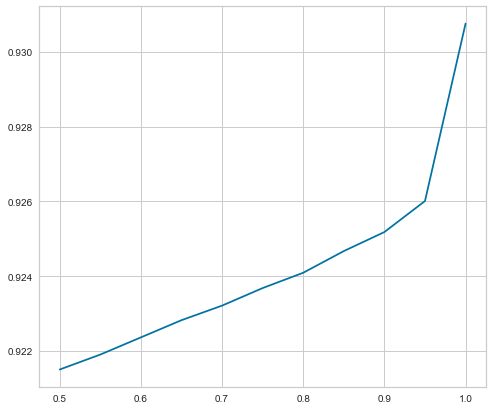

In [344]:
# train
plt.figure(figsize=(8,7))
plt.plot(subsample, train, label='train')
plt.show();

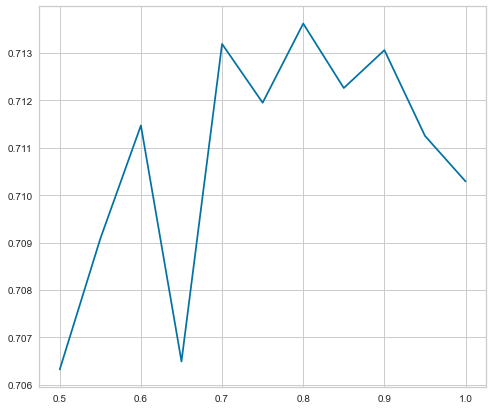

In [345]:
# test
plt.figure(figsize=(8,7))
plt.plot(subsample, test, label = 'test')
plt.show(); 

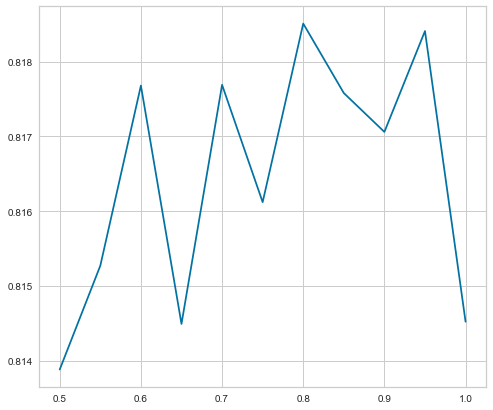

In [346]:
# val
plt.figure(figsize=(8,7))
plt.plot(subsample, val, label='val')
plt.show(); 

> THIS IS WHY I WAS INCREASE THE SUBSAMPLE, I DONT THINK .5 IS ENOUGH. i THINK IT SHOULD BE HIGHER...  in THIS particular case, 0.8 appears to be somewhat optimal...

<br><br><br>

<br><br><br>

### Experiment:  Iterating over reg_alpha

> Iterating over reg_alpha (leveraring GPU speed) ! 

In [284]:
    
print('Iterating over reg_alpha for understanding...')

print('gamma: 8, min_child_weight: 5, max_depth: 4, subsample: 0.6, num_estimators: 3,000, lr = 0.10')
      
start_time = time.time()
    
def QRF_i(df_train, df_val, df_test,model_features, incremental_reg_alpha):
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    # lock down everything but alpha
    
    xg = xgb.XGBRegressor(
    objective='reg:squarederror',
    min_child_weight=5,    
    gamma = 8, 
    subsample = 0.6, 
    colsample_bytree = 0.5,
    reg_alpha = incremental_reg_alpha,
    reg_lambda = 1,
    max_depth=4,     
    n_estimators=3000,
    learning_rate= 0.10,
    seed=42, tree_method='gpu_hist', gpu_id=0)

    print('reg_alpha .......', incremental_reg_alpha)
    
    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    print("Test R^2:...... %.5f" %  r2_score(y_test, y_pred_test))
    print("Val R^2:....... %.5f" %  r2_score(y_val, y_pred_val))
    print("Train R^2:..... %.5f" %  r2_score(y_train, y_pred_train)) 
    print("")
    
for ira in [0,1,5,10,20,30,40,50,60,70,80,90,100,110,120]: 
    
    QRF_i(df_train, df_val, df_test,features_to_use_from_MM, ira)

print("\n--- %s seconds ---" % round((time.time() - start_time)))  


Iterating over reg_alpha for understanding...
gamma: 8, min_child_weight: 5, max_depth: 4, subsample: 0.6, num_estimators: 3,000, lr = 0.10
reg_alpha ....... 0
Test R^2:...... 0.72254
Val R^2:....... 0.82296
Train R^2:..... 0.91507

reg_alpha ....... 1
Test R^2:...... 0.72340
Val R^2:....... 0.82256
Train R^2:..... 0.91510

reg_alpha ....... 5
Test R^2:...... 0.72485
Val R^2:....... 0.82251
Train R^2:..... 0.91510

reg_alpha ....... 10
Test R^2:...... 0.72529
Val R^2:....... 0.82312
Train R^2:..... 0.91512

reg_alpha ....... 20
Test R^2:...... 0.72385
Val R^2:....... 0.82367
Train R^2:..... 0.91497

reg_alpha ....... 30
Test R^2:...... 0.72505
Val R^2:....... 0.82340
Train R^2:..... 0.91501

reg_alpha ....... 40
Test R^2:...... 0.72481
Val R^2:....... 0.82355
Train R^2:..... 0.91493

reg_alpha ....... 50
Test R^2:...... 0.72507
Val R^2:....... 0.82372
Train R^2:..... 0.91476

reg_alpha ....... 60
Test R^2:...... 0.72456
Val R^2:....... 0.82334
Train R^2:..... 0.91464

reg_alpha .......

```
Iterating over reg_alpha for understanding...
gamma: 8, min_child_weight: 5, max_depth: 4, subsample: 0.6, num_estimators: 3,000, lr = 0.10
reg_alpha ....... 0
Test R^2:...... 0.72254
Val R^2:....... 0.82296
Train R^2:..... 0.91507

reg_alpha ....... 1
Test R^2:...... 0.72340
Val R^2:....... 0.82256
Train R^2:..... 0.91510

reg_alpha ....... 5
Test R^2:...... 0.72485
Val R^2:....... 0.82251
Train R^2:..... 0.91510

reg_alpha ....... 10
Test R^2:...... 0.72529
Val R^2:....... 0.82312
Train R^2:..... 0.91512

reg_alpha ....... 20
Test R^2:...... 0.72385
Val R^2:....... 0.82367
Train R^2:..... 0.91497

reg_alpha ....... 30
Test R^2:...... 0.72505
Val R^2:....... 0.82340
Train R^2:..... 0.91501

reg_alpha ....... 40
Test R^2:...... 0.72481
Val R^2:....... 0.82355
Train R^2:..... 0.91493

reg_alpha ....... 50
Test R^2:...... 0.72507
Val R^2:....... 0.82372
Train R^2:..... 0.91476

reg_alpha ....... 60
Test R^2:...... 0.72456
Val R^2:....... 0.82334
Train R^2:..... 0.91464

reg_alpha ....... 70
Test R^2:...... 0.72392
Val R^2:....... 0.82338
Train R^2:..... 0.91458

reg_alpha ....... 80
Test R^2:...... 0.72324
Val R^2:....... 0.82312
Train R^2:..... 0.91454

reg_alpha ....... 90
Test R^2:...... 0.72451
Val R^2:....... 0.82369
Train R^2:..... 0.91436

reg_alpha ....... 100
Test R^2:...... 0.72376
Val R^2:....... 0.82352
Train R^2:..... 0.91431

reg_alpha ....... 110
Test R^2:...... 0.72454
Val R^2:....... 0.82319
Train R^2:..... 0.91422

reg_alpha ....... 120
Test R^2:...... 0.72441
Val R^2:....... 0.82322
Train R^2:..... 0.91409
```

In [347]:

alpha = [0,1,5,10,20,30,40,50,60,70,80,90,100,110,120]

train = [0.91507,
0.91510,
0.91510,
0.91512,
0.91497,
0.91501,
0.91493,
0.91476,
0.91464,
0.91458,
0.91454,
0.91436,
0.91431,
0.91422,
0.91409]


test = [0.72254,
0.72340,
0.72485,
0.72529,
0.72385,
0.72505,
0.72481,
0.72507,
0.72456,
0.72392,
0.72324,
0.72451,
0.72376,
0.72454,
0.72441]

val = [0.82296,
0.82256,
0.82251,
0.82312,
0.82367,
0.82340,
0.82355,
0.82372,
0.82334,
0.82338,
0.82312,
0.82369,
0.82352,
0.82319,
0.82322]

        
df = pd.DataFrame(list(zip(alpha, train, test, val)),
               columns =['alpha', "train", "test", "val"])

df


,alpha,train,test,val
0,0,0.91507,0.72254,0.82296
1,1,0.91510,0.72340,0.82256
2,5,0.91510,0.72485,0.82251
3,10,0.91512,0.72529,0.82312
4,20,0.91497,0.72385,0.82367
5,30,0.91501,0.72505,0.82340
6,40,0.91493,0.72481,0.82355
7,50,0.91476,0.72507,0.82372
8,60,0.91464,0.72456,0.82334
9,70,0.91458,0.72392,0.82338


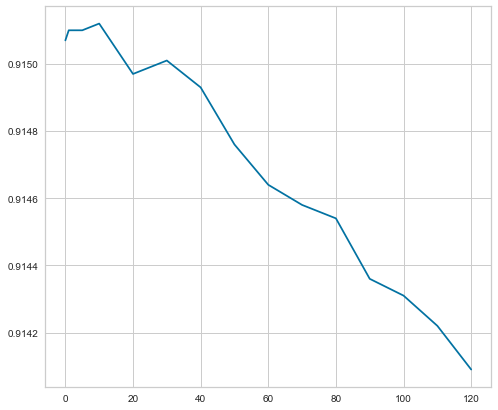

In [348]:
# train
plt.figure(figsize=(8,7))
plt.plot(alpha, train, label='train')
plt.show();

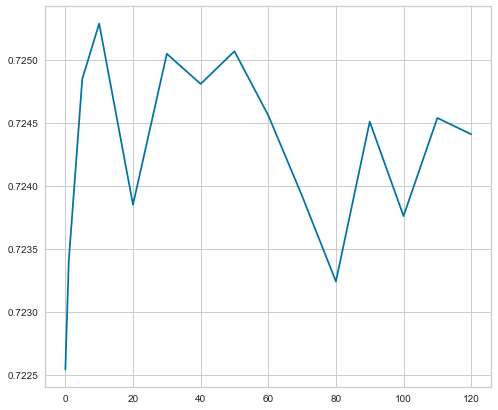

In [349]:
# test
plt.figure(figsize=(8,7))
plt.plot(alpha, test, label = 'test')
plt.show(); 

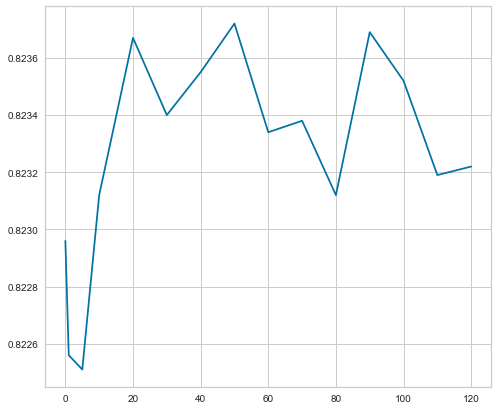

In [350]:
# val
plt.figure(figsize=(8,7))
plt.plot(alpha, val, label='val')
plt.show();

> possible reg_alpha a bit too high ? 

In [ ]:
# lets try to retest with lower alpha... 

In [352]:
            
def QRF_i(df_train, df_val, df_test,model_features):
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
       
    xg = xgb.XGBRegressor(
    objective='reg:squarederror',
    min_child_weight=5,    
    gamma = 8, 
    subsample = 0.75, 
    colsample_bytree = 0.5,
    reg_alpha = 50,
    reg_lambda = 1,
    max_depth=4,     
    n_estimators=3100,
    learning_rate= 0.10,
    seed=42, tree_method='gpu_hist', gpu_id=0)

    xg.fit(X_train, y_train)
    
    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    print("Test R^2:...... %.5f" %  r2_score(y_test, y_pred_test))
    print("Val R^2:....... %.5f" %  r2_score(y_val, y_pred_val))
    print("Train R^2:..... %.5f" %  r2_score(y_train, y_pred_train)) 
    print("")
    
QRF_i(df_train, df_val, df_test,features_to_use_from_MM)

# if max_depth = 5:
# Test R^2:...... 0.72514
# Val R^2:....... 0.82390
# Train R^2:..... 0.91851
    

Test R^2:...... 0.72470
Val R^2:....... 0.82394
Train R^2:..... 0.91573



<br><br>

### --- YOU CAN IGNORE EVERYTHING PAST THIS LINE, IT IS PREVIOUS GRIDSEARCH EXAMINATIONS ---

### --- YOU CAN IGNORE EVERYTHING PAST THIS LINE, IT IS PREVIOUS GRIDSEARCH EXAMINATIONS ---

### --- YOU CAN IGNORE EVERYTHING PAST THIS LINE, IT IS PREVIOUS GRIDSEARCH EXAMINATIONS ---

---

---

---

## Previous Gridsearch Investigation

```python
def model_starting_over(df_train, df_val, df_test,model_features):
    
    start_time = time.time()
    target = ['price_per_sq_m_per_lease_yr_norm']  
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    xgb1 = xgb.XGBRegressor(n_jobs=23)  
   
    parameters = {'learning_rate': [0.1, 0.2],  
                  'nthread':[23], 
                  'objective':['reg:squarederror'],
                  'max_depth': [3,4,5],
                  'min_child_weight': [4,5,6],
                  'seed': [42],
                  'reg_lambda': [1],
                  'reg_alpha': [100],
                  'gamma': [9,10,11,12],
                  'subsample': [0.5],
                  'colsample_bytree': [0.5],
                  'n_estimators': [300]}
    
    xgb_grid = GridSearchCV(xgb1,
                            param_grid=parameters, 
                            cv = 3, # kfold
                            scoring="r2",
                            n_jobs = 23,
                            verbose=3,
                            return_train_score=True)

    xgb_grid.fit(X_train, y_train)
    
    print(xgb_grid.best_score_)
    
    print(xgb_grid.best_params_)

    print("\n\n--- %s seconds ---" % round((time.time() - start_time)))
    
    print('')

model_starting_over(df_train, df_val, df_test,m2)
```

In [ ]:
  
def model_z(df_train, df_val, df_test,model_features):
        
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this ! 
    
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
 
    xg = xgb.XGBRegressor(
        objective='reg:squarederror',
        max_depth=5,
        min_child_weight=4,
        gamma = 10,
        subsample=0.5,
        colsample_bytree = 0.5,
        reg_alpha = 100,
        reg_lambda = 1,
        n_estimators=3000,
        learning_rate=0.1,
        nthread=4,
        seed=42,
        tree_method='gpu_hist',   
        gpu_id = 0)

    xg.fit(X_train, y_train)

    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    print('\n--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    
    print('\n--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  

    print('\n--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    
    print('\n\nModel Hyperparameters Definitions:')
    pprint(xg.get_params())
    
model_z(df_train, df_val, df_test,m2)

# TOOK 4.4 hours to gridsearch


```

    xg = xgb.XGBRegressor(
        objective='reg:squarederror',
        max_depth=5,
        min_child_weight=4,
        gamma = 10,
        subsample=0.5,
        colsample_bytree = 0.5,
        reg_alpha = 100,
        reg_lambda = 1,
        n_estimators=2000,
        learning_rate=0.1,
        nthread=4,
        seed=42,
        tree_method='gpu_hist')
        
        
--- Test Set ---
Mean Absolute Error: ... 6.329340072458903
Mean Squared Error:..... 71.69
RMSE: .................. 8.467033123446308
Coeff of det (R^2):..... 0.796

--- Val Set ---
Mean Absolute Error: ... 4.85670361588014
Mean Squared Error:..... 43.11
RMSE: .................. 6.565790847940509
Coeff of det (R^2):..... 0.892

--- Train Set ---
Mean Absolute Error: ... 2.6639812592213366
Mean Squared Error:..... 13.24
RMSE: .................. 3.638893099327041
Coeff of det (R^2):..... 0.955


Model Hyperparameters Definitions:
{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 10,
 'gpu_id': 0,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 5,
 'max_leaves': 0,
 'min_child_weight': 4,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 1000,
 'n_jobs': 4,
 'nthread': 4,
 'num_parallel_tree': 1,
 'objective': 'reg:squarederror',
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 100,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'seed': 42,
 'subsample': 0.5,
 'tree_method': 'gpu_hist',
 'validate_parameters': 1,
 'verbosity': None}
```

```python
import optuna
from optuna import create_study
from optuna.samplers import TPESampler
from optuna.integration import XGBoostPruningCallback
```

In [ ]:
from io import StringIO

data = ("""

id,param,def_value,descr

1,base_score,0.5,initial prediction score of all instances

2,booster,gbtree, can be gbtree gblinear or dart. gbtree is tree-based model

3,num_estimates,100,number of estimates

4,max_depth, 6,maximum depth of a tree (too high a value leads to overfitting)

5,eta, 0.3, step size shrinkage (learning rate) used in update to prevent overfitting

6,gamma, 0, alias of min_split_loss with min loss reduction required to make a further partition on a leaf node of the tree

7,min_child_weight,1,min sum of instance weight (hessian) needed in a child

8,max_delta_step, 0, max delta step allowed each output to be

9,subsample,1,subsample ratio of the training instances

10, sampling_method, uniform, method used to sample the training instances

11,colsample_bytree, 1, subsampling

12,colsample_bylevel, 1, subsampling

13, colsample_bynode,1,subsampling

14,lambda,1, alias of reg_lambda the L2 regularization term on weights

15, alpha, 0, alias of reg_alpha the L1 regularization term on weights

16, tree_method, auto, tree construction alg used in xgboost

17,sketch_eps, 0.03,-

18, scale_pos_weight, 1, controls balance of positive and negative weights

19, updater, grow_colmaker prun, -

20, refresh_leaf, 1, refresh updater

21,process_type, default, choices of default and update

22, grow_policy, depthwise, controls way new nodes are added to the tree

23, max_leaves,0, max number of nodes to be added

24,max_bin, 256, only used if tree_method is set to hist or gpu_hist

25, verbosity, 1, verbosity of printing messages

26, num_feature, automatically discovered, feature dimension used in boosting set to max dim of the feature

""")

mapper = pd.read_csv(StringIO(data))

d = dict(selector="th",
    props=[('text-align', 'center')])

mapper = mapper.set_index('id')

mapper = mapper.style.set_properties(**{'width':'10em', 'text-align':'center'})\
        .set_table_styles([d])

mapper

In [ ]:
html = mapper.to_html();
print(html)

<style type="text/css">
#T_680ba_ th {
  text-align: center;
}
#T_680ba_row0_col0, #T_680ba_row0_col1, #T_680ba_row0_col2, #T_680ba_row1_col0, #T_680ba_row1_col1, #T_680ba_row1_col2, #T_680ba_row2_col0, #T_680ba_row2_col1, #T_680ba_row2_col2, #T_680ba_row3_col0, #T_680ba_row3_col1, #T_680ba_row3_col2, #T_680ba_row4_col0, #T_680ba_row4_col1, #T_680ba_row4_col2, #T_680ba_row5_col0, #T_680ba_row5_col1, #T_680ba_row5_col2, #T_680ba_row6_col0, #T_680ba_row6_col1, #T_680ba_row6_col2, #T_680ba_row7_col0, #T_680ba_row7_col1, #T_680ba_row7_col2, #T_680ba_row8_col0, #T_680ba_row8_col1, #T_680ba_row8_col2, #T_680ba_row9_col0, #T_680ba_row9_col1, #T_680ba_row9_col2, #T_680ba_row10_col0, #T_680ba_row10_col1, #T_680ba_row10_col2, #T_680ba_row11_col0, #T_680ba_row11_col1, #T_680ba_row11_col2, #T_680ba_row12_col0, #T_680ba_row12_col1, #T_680ba_row12_col2, #T_680ba_row13_col0, #T_680ba_row13_col1, #T_680ba_row13_col2, #T_680ba_row14_col0, #T_680ba_row14_col1, #T_680ba_row14_col2, #T_680ba_row15_col0, #T_680ba_row15_col1, #T_680ba_row15_col2, #T_680ba_row16_col0, #T_680ba_row16_col1, #T_680ba_row16_col2, #T_680ba_row17_col0, #T_680ba_row17_col1, #T_680ba_row17_col2, #T_680ba_row18_col0, #T_680ba_row18_col1, #T_680ba_row18_col2, #T_680ba_row19_col0, #T_680ba_row19_col1, #T_680ba_row19_col2, #T_680ba_row20_col0, #T_680ba_row20_col1, #T_680ba_row20_col2, #T_680ba_row21_col0, #T_680ba_row21_col1, #T_680ba_row21_col2, #T_680ba_row22_col0, #T_680ba_row22_col1, #T_680ba_row22_col2, #T_680ba_row23_col0, #T_680ba_row23_col1, #T_680ba_row23_col2, #T_680ba_row24_col0, #T_680ba_row24_col1, #T_680ba_row24_col2, #T_680ba_row25_col0, #T_680ba_row25_col1, #T_680ba_row25_col2 {
  width: 10em;
  text-align: center;
}
</style>
<table id="T_680ba_">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th class="col_heading level0 col0" >param</th>
      <th class="col_heading level0 col1" >def_value</th>
      <th class="col_heading level0 col2" >descr</th>
    </tr>
    <tr>
      <th class="index_name level0" >id</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_680ba_level0_row0" class="row_heading level0 row0" >1</th>
      <td id="T_680ba_row0_col0" class="data row0 col0" >base_score</td>
      <td id="T_680ba_row0_col1" class="data row0 col1" >0.5</td>
      <td id="T_680ba_row0_col2" class="data row0 col2" >initial prediction score of all instances</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row1" class="row_heading level0 row1" >2</th>
      <td id="T_680ba_row1_col0" class="data row1 col0" >booster</td>
      <td id="T_680ba_row1_col1" class="data row1 col1" >gbtree</td>
      <td id="T_680ba_row1_col2" class="data row1 col2" > can be gbtree gblinear or dart. gbtree is tree-based model</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row2" class="row_heading level0 row2" >3</th>
      <td id="T_680ba_row2_col0" class="data row2 col0" >num_estimates</td>
      <td id="T_680ba_row2_col1" class="data row2 col1" >100</td>
      <td id="T_680ba_row2_col2" class="data row2 col2" >number of estimates</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row3" class="row_heading level0 row3" >4</th>
      <td id="T_680ba_row3_col0" class="data row3 col0" >max_depth</td>
      <td id="T_680ba_row3_col1" class="data row3 col1" > 6</td>
      <td id="T_680ba_row3_col2" class="data row3 col2" >maximum depth of a tree (too high a value leads to overfitting)</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row4" class="row_heading level0 row4" >5</th>
      <td id="T_680ba_row4_col0" class="data row4 col0" >eta</td>
      <td id="T_680ba_row4_col1" class="data row4 col1" > 0.3</td>
      <td id="T_680ba_row4_col2" class="data row4 col2" > step size shrinkage (learning rate) used in update to prevent overfitting</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row5" class="row_heading level0 row5" >6</th>
      <td id="T_680ba_row5_col0" class="data row5 col0" >gamma</td>
      <td id="T_680ba_row5_col1" class="data row5 col1" > 0</td>
      <td id="T_680ba_row5_col2" class="data row5 col2" > alias of min_split_loss with min loss reduction required to make a further partition on a leaf node of the tree</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row6" class="row_heading level0 row6" >7</th>
      <td id="T_680ba_row6_col0" class="data row6 col0" >min_child_weight</td>
      <td id="T_680ba_row6_col1" class="data row6 col1" >1</td>
      <td id="T_680ba_row6_col2" class="data row6 col2" >min sum of instance weight (hessian) needed in a child</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row7" class="row_heading level0 row7" >8</th>
      <td id="T_680ba_row7_col0" class="data row7 col0" >max_delta_step</td>
      <td id="T_680ba_row7_col1" class="data row7 col1" > 0</td>
      <td id="T_680ba_row7_col2" class="data row7 col2" > max delta step allowed each output to be</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row8" class="row_heading level0 row8" >9</th>
      <td id="T_680ba_row8_col0" class="data row8 col0" >subsample</td>
      <td id="T_680ba_row8_col1" class="data row8 col1" >1</td>
      <td id="T_680ba_row8_col2" class="data row8 col2" >subsample ratio of the training instances</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row9" class="row_heading level0 row9" >10</th>
      <td id="T_680ba_row9_col0" class="data row9 col0" > sampling_method</td>
      <td id="T_680ba_row9_col1" class="data row9 col1" > uniform</td>
      <td id="T_680ba_row9_col2" class="data row9 col2" > method used to sample the training instances</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row10" class="row_heading level0 row10" >11</th>
      <td id="T_680ba_row10_col0" class="data row10 col0" >colsample_bytree</td>
      <td id="T_680ba_row10_col1" class="data row10 col1" > 1</td>
      <td id="T_680ba_row10_col2" class="data row10 col2" > subsampling</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row11" class="row_heading level0 row11" >12</th>
      <td id="T_680ba_row11_col0" class="data row11 col0" >colsample_bylevel</td>
      <td id="T_680ba_row11_col1" class="data row11 col1" > 1</td>
      <td id="T_680ba_row11_col2" class="data row11 col2" > subsampling</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row12" class="row_heading level0 row12" >13</th>
      <td id="T_680ba_row12_col0" class="data row12 col0" > colsample_bynode</td>
      <td id="T_680ba_row12_col1" class="data row12 col1" >1</td>
      <td id="T_680ba_row12_col2" class="data row12 col2" >subsampling</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row13" class="row_heading level0 row13" >14</th>
      <td id="T_680ba_row13_col0" class="data row13 col0" >lambda</td>
      <td id="T_680ba_row13_col1" class="data row13 col1" >1</td>
      <td id="T_680ba_row13_col2" class="data row13 col2" > alias of reg_lambda the L2 regularization term on weights</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row14" class="row_heading level0 row14" >15</th>
      <td id="T_680ba_row14_col0" class="data row14 col0" > alpha</td>
      <td id="T_680ba_row14_col1" class="data row14 col1" > 0</td>
      <td id="T_680ba_row14_col2" class="data row14 col2" > alias of reg_alpha the L1 regularization term on weights</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row15" class="row_heading level0 row15" >16</th>
      <td id="T_680ba_row15_col0" class="data row15 col0" > tree_method</td>
      <td id="T_680ba_row15_col1" class="data row15 col1" > auto</td>
      <td id="T_680ba_row15_col2" class="data row15 col2" > tree construction alg used in xgboost</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row16" class="row_heading level0 row16" >17</th>
      <td id="T_680ba_row16_col0" class="data row16 col0" >sketch_eps</td>
      <td id="T_680ba_row16_col1" class="data row16 col1" > 0.03</td>
      <td id="T_680ba_row16_col2" class="data row16 col2" >-</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row17" class="row_heading level0 row17" >18</th>
      <td id="T_680ba_row17_col0" class="data row17 col0" > scale_pos_weight</td>
      <td id="T_680ba_row17_col1" class="data row17 col1" > 1</td>
      <td id="T_680ba_row17_col2" class="data row17 col2" > controls balance of positive and negative weights</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row18" class="row_heading level0 row18" >19</th>
      <td id="T_680ba_row18_col0" class="data row18 col0" > updater</td>
      <td id="T_680ba_row18_col1" class="data row18 col1" > grow_colmaker prun</td>
      <td id="T_680ba_row18_col2" class="data row18 col2" > -</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row19" class="row_heading level0 row19" >20</th>
      <td id="T_680ba_row19_col0" class="data row19 col0" > refresh_leaf</td>
      <td id="T_680ba_row19_col1" class="data row19 col1" > 1</td>
      <td id="T_680ba_row19_col2" class="data row19 col2" > refresh updater</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row20" class="row_heading level0 row20" >21</th>
      <td id="T_680ba_row20_col0" class="data row20 col0" >process_type</td>
      <td id="T_680ba_row20_col1" class="data row20 col1" > default</td>
      <td id="T_680ba_row20_col2" class="data row20 col2" > choices of default and update</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row21" class="row_heading level0 row21" >22</th>
      <td id="T_680ba_row21_col0" class="data row21 col0" > grow_policy</td>
      <td id="T_680ba_row21_col1" class="data row21 col1" > depthwise</td>
      <td id="T_680ba_row21_col2" class="data row21 col2" > controls way new nodes are added to the tree</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row22" class="row_heading level0 row22" >23</th>
      <td id="T_680ba_row22_col0" class="data row22 col0" > max_leaves</td>
      <td id="T_680ba_row22_col1" class="data row22 col1" >0</td>
      <td id="T_680ba_row22_col2" class="data row22 col2" > max number of nodes to be added</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row23" class="row_heading level0 row23" >24</th>
      <td id="T_680ba_row23_col0" class="data row23 col0" >max_bin</td>
      <td id="T_680ba_row23_col1" class="data row23 col1" > 256</td>
      <td id="T_680ba_row23_col2" class="data row23 col2" > only used if tree_method is set to hist or gpu_hist</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row24" class="row_heading level0 row24" >25</th>
      <td id="T_680ba_row24_col0" class="data row24 col0" > verbosity</td>
      <td id="T_680ba_row24_col1" class="data row24 col1" > 1</td>
      <td id="T_680ba_row24_col2" class="data row24 col2" > verbosity of printing messages</td>
    </tr>
    <tr>
      <th id="T_680ba_level0_row25" class="row_heading level0 row25" >26</th>
      <td id="T_680ba_row25_col0" class="data row25 col0" > num_feature</td>
      <td id="T_680ba_row25_col1" class="data row25 col1" > automatically discovered</td>
      <td id="T_680ba_row25_col2" class="data row25 col2" > feature dimension used in boosting set to max dim of the feature</td>
    </tr>
  </tbody>
</table>

<style type="text/css">
#T_fb6db_ th {
  text-align: center;
}
#T_fb6db_row0_col0, #T_fb6db_row0_col1, #T_fb6db_row0_col2, #T_fb6db_row1_col0, #T_fb6db_row1_col1, #T_fb6db_row1_col2, #T_fb6db_row2_col0, #T_fb6db_row2_col1, #T_fb6db_row2_col2, #T_fb6db_row3_col0, #T_fb6db_row3_col1, #T_fb6db_row3_col2, #T_fb6db_row4_col0, #T_fb6db_row4_col1, #T_fb6db_row4_col2, #T_fb6db_row5_col0, #T_fb6db_row5_col1, #T_fb6db_row5_col2, #T_fb6db_row6_col0, #T_fb6db_row6_col1, #T_fb6db_row6_col2, #T_fb6db_row7_col0, #T_fb6db_row7_col1, #T_fb6db_row7_col2, #T_fb6db_row8_col0, #T_fb6db_row8_col1, #T_fb6db_row8_col2, #T_fb6db_row9_col0, #T_fb6db_row9_col1, #T_fb6db_row9_col2, #T_fb6db_row10_col0, #T_fb6db_row10_col1, #T_fb6db_row10_col2, #T_fb6db_row11_col0, #T_fb6db_row11_col1, #T_fb6db_row11_col2, #T_fb6db_row12_col0, #T_fb6db_row12_col1, #T_fb6db_row12_col2, #T_fb6db_row13_col0, #T_fb6db_row13_col1, #T_fb6db_row13_col2, #T_fb6db_row14_col0, #T_fb6db_row14_col1, #T_fb6db_row14_col2, #T_fb6db_row15_col0, #T_fb6db_row15_col1, #T_fb6db_row15_col2, #T_fb6db_row16_col0, #T_fb6db_row16_col1, #T_fb6db_row16_col2, #T_fb6db_row17_col0, #T_fb6db_row17_col1, #T_fb6db_row17_col2, #T_fb6db_row18_col0, #T_fb6db_row18_col1, #T_fb6db_row18_col2, #T_fb6db_row19_col0, #T_fb6db_row19_col1, #T_fb6db_row19_col2, #T_fb6db_row20_col0, #T_fb6db_row20_col1, #T_fb6db_row20_col2, #T_fb6db_row21_col0, #T_fb6db_row21_col1, #T_fb6db_row21_col2, #T_fb6db_row22_col0, #T_fb6db_row22_col1, #T_fb6db_row22_col2, #T_fb6db_row23_col0, #T_fb6db_row23_col1, #T_fb6db_row23_col2, #T_fb6db_row24_col0, #T_fb6db_row24_col1, #T_fb6db_row24_col2, #T_fb6db_row25_col0, #T_fb6db_row25_col1, #T_fb6db_row25_col2 {
  width: 10em;
  text-align: center;
}
</style>
<table id="T_fb6db_">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th class="col_heading level0 col0" >param</th>
      <th class="col_heading level0 col1" >def_value</th>
      <th class="col_heading level0 col2" >descr</th>
    </tr>
    <tr>
      <th class="index_name level0" >id</th>
      <th class="blank col0" >&nbsp;</th>
      <th class="blank col1" >&nbsp;</th>
      <th class="blank col2" >&nbsp;</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_fb6db_level0_row0" class="row_heading level0 row0" >1</th>
      <td id="T_fb6db_row0_col0" class="data row0 col0" >base_score</td>
      <td id="T_fb6db_row0_col1" class="data row0 col1" >0.5</td>
      <td id="T_fb6db_row0_col2" class="data row0 col2" >initial prediction score of all instances</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row1" class="row_heading level0 row1" >2</th>
      <td id="T_fb6db_row1_col0" class="data row1 col0" >booster</td>
      <td id="T_fb6db_row1_col1" class="data row1 col1" >gbtree</td>
      <td id="T_fb6db_row1_col2" class="data row1 col2" > can be gbtree gblinear or dart. gbtree is tree-based model</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row2" class="row_heading level0 row2" >3</th>
      <td id="T_fb6db_row2_col0" class="data row2 col0" >num_estimates</td>
      <td id="T_fb6db_row2_col1" class="data row2 col1" >100</td>
      <td id="T_fb6db_row2_col2" class="data row2 col2" >number of estimates</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row3" class="row_heading level0 row3" >4</th>
      <td id="T_fb6db_row3_col0" class="data row3 col0" >max_depth</td>
      <td id="T_fb6db_row3_col1" class="data row3 col1" > 6</td>
      <td id="T_fb6db_row3_col2" class="data row3 col2" >maximum depth of a tree (too high a value leads to overfitting)</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row4" class="row_heading level0 row4" >5</th>
      <td id="T_fb6db_row4_col0" class="data row4 col0" >eta</td>
      <td id="T_fb6db_row4_col1" class="data row4 col1" > 0.3</td>
      <td id="T_fb6db_row4_col2" class="data row4 col2" > step size shrinkage (learning rate) used in update to prevent overfitting</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row5" class="row_heading level0 row5" >6</th>
      <td id="T_fb6db_row5_col0" class="data row5 col0" >gamma</td>
      <td id="T_fb6db_row5_col1" class="data row5 col1" > 0</td>
      <td id="T_fb6db_row5_col2" class="data row5 col2" > alias of min_split_loss with min loss reduction required to make a further partition on a leaf node of the tree</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row6" class="row_heading level0 row6" >7</th>
      <td id="T_fb6db_row6_col0" class="data row6 col0" >min_child_weight</td>
      <td id="T_fb6db_row6_col1" class="data row6 col1" >1</td>
      <td id="T_fb6db_row6_col2" class="data row6 col2" >min sum of instance weight (hessian) needed in a child</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row7" class="row_heading level0 row7" >8</th>
      <td id="T_fb6db_row7_col0" class="data row7 col0" >max_delta_step</td>
      <td id="T_fb6db_row7_col1" class="data row7 col1" > 0</td>
      <td id="T_fb6db_row7_col2" class="data row7 col2" > max delta step allowed each output to be</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row8" class="row_heading level0 row8" >9</th>
      <td id="T_fb6db_row8_col0" class="data row8 col0" >subsample</td>
      <td id="T_fb6db_row8_col1" class="data row8 col1" >1</td>
      <td id="T_fb6db_row8_col2" class="data row8 col2" >subsample ratio of the training instances</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row9" class="row_heading level0 row9" >10</th>
      <td id="T_fb6db_row9_col0" class="data row9 col0" > sampling_method</td>
      <td id="T_fb6db_row9_col1" class="data row9 col1" > uniform</td>
      <td id="T_fb6db_row9_col2" class="data row9 col2" > method used to sample the training instances</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row10" class="row_heading level0 row10" >11</th>
      <td id="T_fb6db_row10_col0" class="data row10 col0" >colsample_bytree</td>
      <td id="T_fb6db_row10_col1" class="data row10 col1" > 1</td>
      <td id="T_fb6db_row10_col2" class="data row10 col2" > subsampling</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row11" class="row_heading level0 row11" >12</th>
      <td id="T_fb6db_row11_col0" class="data row11 col0" >colsample_bylevel</td>
      <td id="T_fb6db_row11_col1" class="data row11 col1" > 1</td>
      <td id="T_fb6db_row11_col2" class="data row11 col2" > subsampling</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row12" class="row_heading level0 row12" >13</th>
      <td id="T_fb6db_row12_col0" class="data row12 col0" > colsample_bynode</td>
      <td id="T_fb6db_row12_col1" class="data row12 col1" >1</td>
      <td id="T_fb6db_row12_col2" class="data row12 col2" >subsampling</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row13" class="row_heading level0 row13" >14</th>
      <td id="T_fb6db_row13_col0" class="data row13 col0" >lambda</td>
      <td id="T_fb6db_row13_col1" class="data row13 col1" >1</td>
      <td id="T_fb6db_row13_col2" class="data row13 col2" > alias of reg_lambda the L2 regularization term on weights</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row14" class="row_heading level0 row14" >15</th>
      <td id="T_fb6db_row14_col0" class="data row14 col0" > alpha</td>
      <td id="T_fb6db_row14_col1" class="data row14 col1" > 0</td>
      <td id="T_fb6db_row14_col2" class="data row14 col2" > alias of reg_alpha the L1 regularization term on weights</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row15" class="row_heading level0 row15" >16</th>
      <td id="T_fb6db_row15_col0" class="data row15 col0" > tree_method</td>
      <td id="T_fb6db_row15_col1" class="data row15 col1" > auto</td>
      <td id="T_fb6db_row15_col2" class="data row15 col2" > tree construction alg used in xgboost</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row16" class="row_heading level0 row16" >17</th>
      <td id="T_fb6db_row16_col0" class="data row16 col0" >sketch_eps</td>
      <td id="T_fb6db_row16_col1" class="data row16 col1" > 0.03</td>
      <td id="T_fb6db_row16_col2" class="data row16 col2" >-</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row17" class="row_heading level0 row17" >18</th>
      <td id="T_fb6db_row17_col0" class="data row17 col0" > scale_pos_weight</td>
      <td id="T_fb6db_row17_col1" class="data row17 col1" > 1</td>
      <td id="T_fb6db_row17_col2" class="data row17 col2" > controls balance of positive and negative weights</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row18" class="row_heading level0 row18" >19</th>
      <td id="T_fb6db_row18_col0" class="data row18 col0" > updater</td>
      <td id="T_fb6db_row18_col1" class="data row18 col1" > grow_colmaker prun</td>
      <td id="T_fb6db_row18_col2" class="data row18 col2" > -</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row19" class="row_heading level0 row19" >20</th>
      <td id="T_fb6db_row19_col0" class="data row19 col0" > refresh_leaf</td>
      <td id="T_fb6db_row19_col1" class="data row19 col1" > 1</td>
      <td id="T_fb6db_row19_col2" class="data row19 col2" > refresh updater</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row20" class="row_heading level0 row20" >21</th>
      <td id="T_fb6db_row20_col0" class="data row20 col0" >process_type</td>
      <td id="T_fb6db_row20_col1" class="data row20 col1" > default</td>
      <td id="T_fb6db_row20_col2" class="data row20 col2" > choices of default and update</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row21" class="row_heading level0 row21" >22</th>
      <td id="T_fb6db_row21_col0" class="data row21 col0" > grow_policy</td>
      <td id="T_fb6db_row21_col1" class="data row21 col1" > depthwise</td>
      <td id="T_fb6db_row21_col2" class="data row21 col2" > controls way new nodes are added to the tree</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row22" class="row_heading level0 row22" >23</th>
      <td id="T_fb6db_row22_col0" class="data row22 col0" > max_leaves</td>
      <td id="T_fb6db_row22_col1" class="data row22 col1" >0</td>
      <td id="T_fb6db_row22_col2" class="data row22 col2" > max number of nodes to be added</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row23" class="row_heading level0 row23" >24</th>
      <td id="T_fb6db_row23_col0" class="data row23 col0" >max_bin</td>
      <td id="T_fb6db_row23_col1" class="data row23 col1" > 256</td>
      <td id="T_fb6db_row23_col2" class="data row23 col2" > only used if tree_method is set to hist or gpu_hist</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row24" class="row_heading level0 row24" >25</th>
      <td id="T_fb6db_row24_col0" class="data row24 col0" > verbosity</td>
      <td id="T_fb6db_row24_col1" class="data row24 col1" > 1</td>
      <td id="T_fb6db_row24_col2" class="data row24 col2" > verbosity of printing messages</td>
    </tr>
    <tr>
      <th id="T_fb6db_level0_row25" class="row_heading level0 row25" >26</th>
      <td id="T_fb6db_row25_col0" class="data row25 col0" > num_feature</td>
      <td id="T_fb6db_row25_col1" class="data row25 col1" > automatically discovered</td>
      <td id="T_fb6db_row25_col2" class="data row25 col2" > feature dimension used in boosting set to max dim of the feature</td>
    </tr>
  </tbody>
</table>


### Mark 5:  using Gridsearch (DO NOT TOUCH)

Arguably, there are six (6) hyperparameters for XGBoost that are the most important , which is defined as those with the highest probability of the algorithm yielding the most accurate, unbiased results the quickest without over-fitting: (1) how many sub-trees to train; (2) the maximum tree depth (a regularization hyperparameter); (3) the learning rate; (4) the L1 (reg_alpha) and L2 (reg_ lambda) regularization rates that determine the extremity of weights on the leaves; (5) the complexity control (gamma=γ), a pseudo- regularization hyperparameter; and, (6) minimum child weight, another regularization hyperparameter. 

```python

# tuning... with gridsearch

def model_5(df_train, df_val, df_test,model_features):
    
    target = ['price_per_sq_m_per_lease_yr_norm']  
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    #     xg = xgb.XGBRegressor(
    #         objective='reg:squarederror',
    #         max_depth=7,
    #         min_child_weight=5,
    #         gamma = 14,
    #         subsample=0.5,
    #         colsample_bytree = 0.5,
    #         reg_alpha = 100,
    #         reg_lambda = 1,
    #         n_estimators=900,
    #         learning_rate=0.175,
    #         nthread=4,
    #         seed=42,
    #         tree_method='hist'
    #         )

    #     xg = xgb.XGBRegressor(
    #         objective='reg:squarederror',
    #         max_depth=7,
    #         min_child_weight=5,
    #         gamma = 14,
    #         subsample=0.5,
    #         colsample_bytree = 0.5,
    #         reg_alpha = 100,
    #         reg_lambda = 1,
    #         n_estimators=900,
    #         learning_rate=0.175,
    #         nthread=4,
    #         seed=42,
    #         tree_method='hist'
    #         )
    
    xgb1 = xgb.XGBRegressor()
    
    parameters = {'nthread':[4], 
                  'objective':['reg:squarederror'],
                  'learning_rate': [0.175, .02, .03],
                  'max_depth': [6, 7, 8],
                  # 'min_child_weight': [4,5,6],
                  'seed': [42],
                  'reg_lambda': [1],
                  'reg_alpha': [100],
                  'gamma': [13,14,15],
                  # 'silent': [1],
                  'subsample': [0.5],
                  'colsample_bytree': [0.5],
                  'n_estimators': [200]}
    
    xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
    
    xgb_grid.fit(X_train, y_train)
    
    print(xgb_grid.best_score_)
    
    print(xgb_grid.best_params_)
    
model_5(df_train, df_val, df_test,model_features)

# Fitting 3 folds for each of 27 candidates, totalling 81 fits
# 0.9354053408640629
# {'colsample_bytree': 0.5, 'gamma': 15, 'learning_rate': 0.175, 'max_depth': 7, 'n_estimators': 200, 'nthread': 4, 'objective': 'reg:squarederror', 'reg_alpha': 100, 'reg_lambda': 1, 'seed': 42, 'subsample': 0.5}
```

In [285]:
# the tuned hyps output were: 
# {'colsample_by tree': 0.5, 
#  'gamma': 15, 
#  'learning_rate': 0.175, 
#  'max_depth': 7, 
#  'n_estimators': 200, 
#  'nthread': 4, 
#  'objective': 'reg:squarederror', 
#  'reg_alpha': 100, 
#  'reg_lambda': 1, 
#  'seed': 42, 
#  'subsample': 0.5}

```
DO NOT LOSE THESE RESULTS !!! 

the tuned hyps output were: 

{'colsample_bytree': 0.5, 'gamma': 15, 'learning_rate': 0.175, 'max_depth': 7, 'n_estimators': 200, 'nthread': 4, 'objective': 'reg:squarederror', 'reg_alpha': 100, 'reg_lambda': 1, 'seed': 42, 'subsample': 0.5}



new results:
    
--- Test Set ---
Mean Absolute Error: ... 6.141181177981816
Mean Squared Error:..... 69.33
RMSE: .................. 8.32665013416408
Coeff of det (R^2):..... 0.802

--- Val Set ---
Mean Absolute Error: ... 4.5908275976932025
Mean Squared Error:..... 39.56
RMSE: .................. 6.289831295629641
Coeff of det (R^2):..... 0.901

--- Train Set ---
Mean Absolute Error: ... 2.428798721425251
Mean Squared Error:..... 11.00
RMSE: .................. 3.316272796117301
Coeff of det (R^2):..... 0.963

comparing to the original:
        
R2 Scores: 
Train:0.962 
Validation:0.897
Test:0.795
    
MSE: 
Train:11.153
Validation:40.907 
Test:71.863
```

In [ ]:
  
def model_God(df_train, df_val, df_test,model_features):
    
    start_time = time.time()
    
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this
    
    X_train =  df_train[model_features].copy()
    X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_train = X_train.values
    X_test =  df_test[model_features].copy()
    X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
    X_test = X_test.values
    X_val =  df_val[model_features].copy()
    X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
    X_val = X_val.values
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
    
    #     # --- original params --- 
    #     xg = xgb.XGBRegressor(
    #         objective='reg:squarederror',
    #         max_depth=7,
    #         min_child_weight=5,
    #         gamma = 14,
    #         subsample=0.5,
    #         colsample_bytree = 0.5,
    #         reg_alpha = 100,
    #         reg_lambda = 1,
    #         n_estimators=900,
    #         learning_rate=0.175,
    #         nthread=4,
    #         seed=42,
    #         tree_method='hist'
    #         )

    # --- new tuned params --- 
    xg = xgb.XGBRegressor(
        objective='reg:squarederror',
        max_depth=7,
        min_child_weight=5,
        gamma = 15,
        subsample=0.5,
        colsample_bytree = 0.5,
        reg_alpha = 100,
        reg_lambda = 1,
        n_estimators=900,
        learning_rate=0.172,
        nthread=4,
        seed=42,
        tree_method='hist'
        )
    
    xg.fit(X_train, y_train)

    y_pred_train =  xg.predict(X_train)
    y_pred_test  =  xg.predict(X_test)
    y_pred_val   =  xg.predict(X_val)
    
    print('\n--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    
    print('\n--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  

    print('\n--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    
    # print('\n\nModel Hyperparameters Definitions:')
    # pprint(xg.get_params())
    
    print("\n\n--- %s seconds ---" % round((time.time() - start_time)))
    print('')
    
model_God(df_train, df_val, df_test,model_features)

# fitting 3 folds for each of 27 candidates, totalling 81 fits
# 0.9354053408640629
# 
# {'colsample_bytree': 0.5, 'gamma': 15, 'learning_rate': 0.175, 'max_depth': 7, 
# 'n_estimators': 200, 'nthread': 4, 'objective': 'reg:squarederror', 'reg_alpha': 100,
# 'reg_lambda': 1, 'seed': 42, 'subsample': 0.5}


In [289]:
# Fitting 3 folds for each of 27 candidates, totalling 81 fits
# 0.9354053408640629
# {'colsample_bytree': 0.5, 'gamma': 15, 'learning_rate': 0.175, 'max_depth': 7, 'n_estimators': 200, 'nthread': 4, 'objective': 'reg:squarederror', 'reg_alpha': 100, 'reg_lambda': 1, 'seed': 42, 'subsample': 0.5}

In [288]:

# def model_8(df_train, df_val, df_test,model_features):
    
#     target = ['price_per_sq_m_per_lease_yr_norm']  
#     X_train =  df_train[model_features].copy()
#     X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
#     X_train = X_train.values
#     X_test =  df_test[model_features].copy()
#     X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
#     X_test = X_test.values
#     X_val =  df_val[model_features].copy()
#     X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')   
#     X_val = X_val.values
#     y_train =  df_train[target].values.ravel()
#     y_val   =  df_val[target].values.ravel()
#     y_test  =  df_test[target].values.ravel()
    
#     #     xg = xgb.XGBRegressor(
#     #         objective='reg:squarederror',
#     #         max_depth=7,
#     #         min_child_weight=5,
#     #         gamma = 14,
#     #         subsample=0.5,
#     #         colsample_bytree = 0.5,
#     #         reg_alpha = 100,
#     #         reg_lambda = 1,
#     #         n_estimators=900,
#     #         learning_rate=0.175,
#     #         nthread=4,
#     #         seed=42,
#     #         tree_method='hist'
#     #         )


#     xgb1 = xgb.XGBRegressor()
    
#     parameters = {'nthread':[24], 
#                   'objective':['reg:squarederror'],
#                   'learning_rate': [0.15, 0.16, 0.175],
#                   'max_depth': [7],
#                   'min_child_weight': [4,5,6],
#                   'seed': [42],
#                   'reg_lambda': [1],
#                   'reg_alpha': [100],
#                   'gamma': [13,14,15],
#                   # 'silent': [1],
#                   'subsample': [0.4, 0.5],
#                   'colsample_bytree': [0.5],
#                   'n_estimators': [300]}
    
#     xgb_grid = GridSearchCV(xgb1,
#                         parameters,
#                         cv = 3,
#                         n_jobs = -1,
#                         verbose=True)
    
#     xgb_grid.fit(X_train, y_train)
    
#     print(xgb_grid.best_score_)
    
#     print(xgb_grid.best_params_)

#     #     y_pred_train =  xg.predict(X_train)
#     #     y_pred_test  =  xg.predict(X_test)
#     #     y_pred_val   =  xg.predict(X_val)

#     #     print('\n--- Test Set ---')
#     #     print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
#     #     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
#     #     print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))   
#     #     print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  

#     #     print('\n--- Val Set ---')
#     #     print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
#     #     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
#     #     print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))   
#     #     print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  

#     #     print('\n--- Train Set ---')
#     #     print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
#     #     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
#     #     print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
#     #     print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  

#     #     # print('\n\nModel Hyperparameters Definitions:')
#     #     # pprint(xg.get_params())
    
#     # print("\n\n--- %s seconds ---" % round((time.time() - start_time)))
#     # print('')
    
# model_8(df_train, df_val, df_test,model_features)


### Mark 9 - 6 hours of waiting (tuning)

```
the tuned hyps output were: 

Fitting 3 folds for each of 54 candidates, totalling 162 fits
0.9367799562786802
{'colsample_bytree': 0.5, 'gamma': 14, 'learning_rate': 0.16, 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 300, 'nthread': 24, 'objective': 'reg:squarederror', 'reg_alpha': 100, 'reg_lambda': 1, 'seed': 42, 'subsample': 0.5}



--- Test Set ---
Mean Absolute Error: ... 6.141181177981816
Mean Squared Error:..... 69.33
RMSE: .................. 8.32665013416408
Coeff of det (R^2):..... 0.802

--- Val Set ---
Mean Absolute Error: ... 4.5908275976932025
Mean Squared Error:..... 39.56
RMSE: .................. 6.289831295629641
Coeff of det (R^2):..... 0.901

--- Train Set ---
Mean Absolute Error: ... 2.428798721425251
Mean Squared Error:..... 11.00
RMSE: .................. 3.316272796117301
Coeff of det (R^2):..... 0.963



NEW results:

grid was: 

    parameters = {'nthread':[24], 
                  'objective':['reg:squarederror'],
                  'learning_rate': [0.15, 0.16, 0.175],
                  'max_depth': [7],
                  'min_child_weight': [4,5,6],
                  'seed': [42],
                  'reg_lambda': [1],
                  'reg_alpha': [100],
                  'gamma': [13,14,15],
                  # 'silent': [1],
                  'subsample': [0.4, 0.5],
                  'colsample_bytree': [0.5],
                  'n_estimators': [300]}
                  
Fitting 3 folds for each of 54 candidates, totalling 162 fits
0.9367799562786802
{'colsample_bytree': 0.5, 'gamma': 14, 'learning_rate': 0.16, 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 300, 'nthread': 24, 'objective': 'reg:squarederror', 'reg_alpha': 100, 'reg_lambda': 1, 'seed': 42, 'subsample': 0.5}


so you are officially testing this: 


    xg = xgb.XGBRegressor(
        objective='reg:squarederror',
        max_depth=7,
        min_child_weight=6,
        gamma = 14,
        subsample=0.5,  # not 0.4, so go higher !!! 
        colsample_bytree = 0.5,
        reg_alpha = 100,
        reg_lambda = 1,
        n_estimators=1000,
        learning_rate=0.16,
        nthread=4,
        seed=42,
        tree_method='hist'
        )
        

comparing to the original:
        
R2 Scores: 
Train:0.962 
Validation:0.897
Test:0.795
    
MSE: 
Train:11.153
Validation:40.907 
Test:71.863
```

#### this is really good, comment out when ready

In [287]:
# 
# def model_G(df_train, df_val, df_test,model_features):
    
#     import matplotlib.pyplot as plt
#     %matplotlib inline
    
        
#     target = ['price_per_sq_m_per_lease_yr_norm']  # predict this
    
#     X_train =  df_train[model_features].copy()
#     X_train = X_train.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
#     X_train_s = X_train.copy()
#     X_train = X_train.values
#     X_test =  df_test[model_features].copy()
#     X_test =  X_test.drop(columns = 'price_per_sq_m_per_lease_yr_norm')
#     X_test_s = X_test.copy()
#     X_test = X_test.values
#     X_val =  df_val[model_features].copy()
#     X_val = X_val.drop(columns = 'price_per_sq_m_per_lease_yr_norm')  
#     X_val_s = X_val.copy()
#     X_val = X_val.values
#     y_train =  df_train[target].values.ravel()
#     y_val   =  df_val[target].values.ravel()
#     y_test  =  df_test[target].values.ravel()
    
#     #     xg = xgb.XGBRegressor(
#     #         objective='reg:squarederror',
#     #         max_depth=7,
#     #         min_child_weight=6,
#     #         gamma = 10, # not 1 
#     #         subsample=0.75,  # not 0.4, was 0.5 ... 
#     #         colsample_bytree = 0.5,  # 0.3 thru 0.8 are kinda the norm 
#     #         reg_alpha = 100,
#     #         reg_lambda = 1,
#     #         n_estimators=750,
#     #         learning_rate=0.16,
#     #         nthread=4,
#     #         seed=42,
#     #         tree_method='hist')
    
    
#     xg = xgb.XGBRegressor(
#         objective='reg:squarederror',
#         max_depth=7,
#         min_child_weight=6,
        
#         gamma = 10, # not 1 
        
#         subsample=0.75,  # not 0.4, was 0.5 ... 
        
#         colsample_bytree = 0.5,  
        
#         reg_alpha = 100,
#         reg_lambda = 1,
#         n_estimators=800,
#         learning_rate=0.16,
#         nthread=4,
#         seed=42,
#         tree_method='hist'
#         )
        
#     xg.fit(X_train, y_train)

#     y_pred_train =  xg.predict(X_train)
#     y_pred_test  =  xg.predict(X_test)
#     y_pred_val   =  xg.predict(X_val)
    
#     print('\n--- Test Set ---')
#     print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
#     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
#     print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))   
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    
#     print('\n--- Val Set ---')
#     print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
#     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
#     print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))   
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  

#     print('\n--- Train Set ---')
#     print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
#     print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
#     print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    
#     # print('\n\nModel Hyperparameters Definitions:')
#     # pprint(xg.get_params())
    
# #     plt.figure(figsize = (10,5), dpi=150)
# #     plt.xlim([0,250])
# #     plt.ylim([0,250])
# #     plt.scatter(y_test,y_pred_test, s=0.5, alpha=.7, color='green')
# #     plt.xlabel('Y Test')
# #     plt.ylabel('Predicted Y')
# #     plt.show()

    
# #     importances = xg.feature_importances_
# #     indices = np.argsort(importances)[::-1]
# #     columns = np.array(list(X_initial))
    
# #     # Print the feature ranking
# #     print("\nFeature ranking:")
# #     for f in range(X_train_s.shape[1]):
# #         print("%d. %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))
    
    
# #     vizualizer = PredictionError(xg, 
# #                                  hist=False, 
# #                                  size=(1000, 700), 
# #                                  alpha=0.5, 
# #                                  dpi=200)
    
# #     vizualizer.fit(X_train, y_train)
# #     vizualizer.score(X_test, y_test)
# #     vizualizer.show(outpath='prediction_error_random_forest_regressor_baseline.png',
# #                    transparent=False)
# #     vizualizer.poof()
# #     print("")
    
    
# #     vizualizer2 = ResidualsPlot(xg, 
# #                                 hist=False, 
# #                                 size=(1000, 700), 
# #                                 alpha=0.5, 
# #                                 train_color="b",
# #                                 test_color="maroon",
# #                                 train_alpha=0.5,
# #                                 test_alpha=0.5,
# #                                 qqplot=True,
# #                                 dpi=200)
    
# #     vizualizer2.fit(X_train, y_train)  
# #     vizualizer2.score(X_test, y_test)
# #     vizualizer2.show(outpath='residuals_random_forest_regressor_baseline.png', 
# #                     transparent=False)
# #     vizualizer2.poof()
# #     print("")
    

# #     viz3  = FeatureImportances(xg,  
# #                                size=(700, 1000), 
# #                                colors=['navy'],
# #                                alpha=0.5,
# #                                dpi=200)
    
# #     viz3.fit(X_train, y_train)
# #     viz3.show(outpath='feature_importances_xgboost_regressor.png', 
# #              transparent=False)
# #     viz3.poof()
    
# #     print('\nXGBoost Regressor Hyperparameters:')
# #     pprint(xg.get_params())
    
    
#     X_shap = pd.concat([X_train_s,X_test_s,X_val_s],ignore_index=False).reset_index(drop=True)
#     explainer = shap.TreeExplainer(xg)
#     shap_values = explainer(X_shap)
#     # summarize the effects of all the features
    
#     shap.plots.beeswarm(shap_values,max_display=15)

    
#     # shap.plots.bar(shap_values,max_display=20)

    
# model_G(df_train, df_val, df_test,model_features)

# # since i had: 
# # Fitting 3 folds for each of 54 candidates, totalling 162 fits
# # 0.9367799562786802
# # {'colsample_bytree': 0.5, 'gamma': 14, 'learning_rate': 0.16, 
# # 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 300, 'nthread': 24, 
# # 'objective': 'reg:squarederror', 'reg_alpha': 100, 'reg_lambda': 1, 
# # 'seed': 42, 'subsample': 0.5}


**--- this is really good ---**

``` 
--- Test Set ---
Mean Absolute Error: ... 6.090311254167271
Mean Squared Error:..... 67.40
RMSE: .................. 8.209974494907295
Coeff of det (R^2):..... 0.808

--- Val Set ---
Mean Absolute Error: ... 4.532208305876176
Mean Squared Error:..... 38.54
RMSE: .................. 6.207995623569827
Coeff of det (R^2):..... 0.903

--- Train Set ---
Mean Absolute Error: ... 2.376025412673316
Mean Squared Error:..... 10.56
RMSE: .................. 3.250119645682687
Coeff of det (R^2):..... 0.964
```

```
then use this:
    

    plt.figure(figsize = (5,5), dpi=150)
    plt.scatter(y_test,y_pred_test, s=0.5, alpha=.7, color='green')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()

    
    importances = rfModel.feature_importances_
    indices = np.argsort(importances)[::-1]
    columns = np.array(list(X_initial))
    # print(importances)
    
    
    # Print the feature ranking
    print("\nFeature ranking:")
    for f in range(X_train.shape[1]):
        print("%d. %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))
    
    
    vizualizer = PredictionError(rfModel, 
                                 hist=False, 
                                 size=(1000, 700), 
                                 alpha=0.5, 
                                 dpi=200)
    
    vizualizer.fit(X_train, y_train)
    vizualizer.score(X_test, y_test)
    vizualizer.show(outpath='prediction_error_random_forest_regressor_baseline.png',
                   transparent=False)
    vizualizer.poof()
    print("")
    
    
    vizualizer2 = ResidualsPlot(rfModel, 
                                hist=False, 
                                size=(1000, 700), 
                                alpha=0.5, 
                                train_color="b",
                                test_color="maroon",
                                train_alpha=0.5,
                                test_alpha=0.5,
                                qqplot=True,
                                dpi=200)
    vizualizer2.fit(X_train, y_train)  
    vizualizer2.score(X_test, y_test)
    vizualizer2.show(outpath='residuals_random_forest_regressor_baseline.png', 
                    transparent=False)
    vizualizer2.poof()
    print("")
    

    viz3  = FeatureImportances(rfModel,  
                               size=(700, 1000), 
                               colors=['navy'],
                               alpha=0.5,
                               dpi=200)
    
    viz3.fit(X_train, y_train)
    viz3.show(outpath='feature_importances_random_forest_regressor.png', 
             transparent=False)
    viz3.poof()
    
    print('\nRandom Forest Regressor Hyperparameters:')
    pprint(rfModel.get_params())
```

```
trying the exact features calculated without features, i.e. the very best you could do with no location features, to get mini baseline ...


rf = RandomForestRegressor(random_state=42, 
                               verbose=0, 
                               n_estimators=1000     # locked
                               bootstrap=True,       # locked
                               max_depth= 6,         # locked 
                               max_features= 18,     # locked
                               min_samples_leaf= 2,  # locked
                               min_samples_split=3,  # locked (could be 3,4)
                               # max_leaf_nodes=max_leaf_nodes, #None,
                               # comment out  max_samples=None,
                               # comment out: min_weight_fraction_leaf=0.0,
                               n_jobs=-1)                            
```

In [ ]:
  
def m1(df_train, df_val, df_test,model_features, input_max_depth):
    
    import time
    
    start_time = time.time()
    
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this
    
    X_train =  df_train[model_features]
    X_train = X_train.drop('price_per_sq_m_per_lease_yr_norm', 1)
    X_train = X_train.values
    
    X_test =  df_test[model_features]
    X_test =  X_test.drop('price_per_sq_m_per_lease_yr_norm', 1)
    X_test = X_test.values
    
    X_val =  df_val[model_features]
    X_val = X_val.drop('price_per_sq_m_per_lease_yr_norm', 1)
    X_val = X_val.values
    
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
       
   
    rfm = RandomForestRegressor(random_state=42, 
                                
                                n_estimators=100,
                                
                                verbose=1, 
                                
                                bootstrap = True, 
                                
                                max_features = 20, 
                                 
                                max_depth=input_max_depth,
                                                    
                                min_samples_leaf= 2, 
                               
                                min_samples_split=3,
                                
                                n_jobs=-1)   

    rfm.fit(X_train, y_train)

    y_pred_train =  rfm.predict(X_train)
    y_pred_test  =  rfm.predict(X_test)
    y_pred_val   =  rfm.predict(X_val)
    
    print('INPUT MAX DEPTH',  input_max_depth)
    print("")
    
    print('\n--- Test Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_test, y_pred_test))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_test, y_pred_test))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_test, y_pred_test)))   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    
    print('\n--- Val Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_val, y_pred_val))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_val, y_pred_val))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_val, y_pred_val)))   
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  

    print('\n--- Train Set ---')
    print('Mean Absolute Error: ...', mean_absolute_error(y_train, y_pred_train))
    print("Mean Squared Error:..... %.2f" % mean_squared_error(y_train, y_pred_train))
    print('RMSE: ..................', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    
    print('\n\nModel Hyperparameters Definitions:')
    pprint(rfm.get_params())
    
    print("\n\n--- %s seconds ---" % round((time.time() - start_time)))
    print('')


In [286]:

# iterate


# def m1_slim(df_train, df_val, df_test,model_features, input_min_samples_split):
    
#     target = ['price_per_sq_m_per_lease_yr_norm']  # predict this
#     X_train =  df_train[model_features]
#     X_train = X_train.drop('price_per_sq_m_per_lease_yr_norm', 1)
#     X_train = X_train.values
    
#     X_test =  df_test[model_features]
#     X_test =  X_test.drop('price_per_sq_m_per_lease_yr_norm', 1)
#     X_test = X_test.values
    
#     X_val =  df_val[model_features]
#     X_val = X_val.drop('price_per_sq_m_per_lease_yr_norm', 1)
#     X_val = X_val.values
    
#     y_train =  df_train[target].values.ravel()
#     y_val   =  df_val[target].values.ravel()
#     y_test  =  df_test[target].values.ravel()
       
   
#     rfm = RandomForestRegressor(random_state=42, 
                                
#                                 n_estimators=100,
                                
#                                 verbose=0, 
                                
#                                 # bootstrap = True, 
                                
#                                 max_features = 'auto', 
                                 
#                                 max_depth= 20,   # 30 or 40 ? 
                                                    
#                                 min_samples_leaf= 2, 
                               
#                                 min_samples_split=input_min_samples_split,
                                
#                                 n_jobs=-1)   
                     
#     rfm.fit(X_train, y_train)

#     y_pred_train =  rfm.predict(X_train)
#     y_pred_test  =  rfm.predict(X_test)
#     y_pred_val   =  rfm.predict(X_val)

#     print('Min Samples Split: ', input_min_samples_split)
    
#     print('\n--- Test Set ---')  
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    
#     print('\n--- Val Set ---')  
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  

#     print('\n--- Train Set ---')
#     print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    
#     # print('\n\nModel Hyperparameters Definitions:')
#     # pprint(rfm.get_params())
    
#     # print("\n\n--- %s seconds ---" % round((time.time() - start_time)))
#     # print('')

    
# for i in [2,4,6,8,10,12,14,16]:
#     m1_slim(df_train, df_val, df_test,model_features, i)
    


```python
def m1_slim(df_train, df_val, df_test,model_features):
    
    target = ['price_per_sq_m_per_lease_yr_norm']  # predict this
    X_train =  df_train[model_features]
    X_train = X_train.drop('price_per_sq_m_per_lease_yr_norm', 1)
    X_train = X_train.values
    
    X_test =  df_test[model_features]
    X_test =  X_test.drop('price_per_sq_m_per_lease_yr_norm', 1)
    X_test = X_test.values
    
    X_val =  df_val[model_features]
    X_val = X_val.drop('price_per_sq_m_per_lease_yr_norm', 1)
    X_val = X_val.values
    
    y_train =  df_train[target].values.ravel()
    y_val   =  df_val[target].values.ravel()
    y_test  =  df_test[target].values.ravel()
       
        
    # {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 15}
    
   
    rfm = RandomForestRegressor(random_state=42, 
                                
                                n_estimators=50,
                                
                                verbose=0, 
                                
                                # bootstrap = True, 
                                
                                max_features = 'auto',   # 
                                 
                                max_depth= 20, 
                                                    
                                min_samples_leaf= 2, 
                                
                                min_samples_split= 5,
                                
                                n_jobs=-1)   
                     
    rfm.fit(X_train, y_train)

    y_pred_train =  rfm.predict(X_train)
    y_pred_test  =  rfm.predict(X_test)
    y_pred_val   =  rfm.predict(X_val)

    # print('Min Samples Split: ', input_min_samples_split)
    
    print('\n--- Test Set ---')  
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_test, y_pred_test))  
    
    print('\n--- Val Set ---')  
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_val, y_pred_val))  

    print('\n--- Train Set ---')
    print("Coeff of det (R^2):..... %.3f" % r2_score(y_train, y_pred_train))  
    
    # print('\n\nModel Hyperparameters Definitions:')
    # pprint(rfm.get_params())
    
    # print("\n\n--- %s seconds ---" % round((time.time() - start_time)))
    # print('')

    
m1_slim(df_train, df_val, df_test,model_features)
```